## 요약
- RF
- XGB
- NN

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

# 그래프의 폰트 출력을 선명하게 (svg, retina 등이 있음)
matplotlib_inline.backend_inline.set_matplotlib_formats("png2x")
# 테마 설정: "default", "classic", "dark_background", "fivethirtyeight", "seaborn"
mpl.style.use("default")
# 이미지가 레이아웃 안으로 들어오도록 함
# https://matplotlib.org/stable/users/explain/axes/constrainedlayout_guide.html
mpl.rcParams.update({"figure.constrained_layout.use": True})

#font, line, marker 등의 배율 설정: paper, notebook, talk, poster
sns.set_context("paper")
#배색 설정: tab10, Set2, Accent, husl
sns.set_palette("Set2")
#눈금, 배경, 격자 설정: ticks, white, whitegrid, dark, darkgrid
# withegrid: 눈금을 그리고, 각 축의 눈금을 제거
sns.set_style("whitegrid")

In [2]:
# 로컬에서

plt.rc("font", family = "D2Coding")
plt.rcParams["axes.unicode_minus"] = False

In [3]:
import os, natsort, re
from tqdm import tqdm
import time, random

In [4]:
PRJCT_PATH = '/home/doeun/code/AI/ESTSOFT2024/workspace/2.project_text/aladin_usedbook/'
#PRJCT_PATH = '/content/drive/MyDrive/WASSUP-ESTsoft-AI/project/project2/'
#PRJCT_PATH = '/content/drive/MyDrive/AI3_prjct2_aladin/aladin_usedbook/'
save_dir = 'processed/model_input'
dir_path = os.path.join(PRJCT_PATH,save_dir)

In [5]:
import sys
sys.path.append(PRJCT_PATH)

In [31]:
from module_aladin.reg_tool import *

In [6]:
import re
def erase_num_comma(text):
    pat = r'\d\,\d'
    idx_list = sorted([m.start()+1 for m in re.finditer(pat,text)])
    temp = list(text)
    for i in idx_list[::-1]:
        temp.pop(i)
    return ''.join(temp)

In [7]:
import pickle

def load_pkl(file_path):
    with open(file_path,'rb') as f:
        data = pickle.load(f)

    return data

In [8]:
data_type = 'whole'
ver=1.0
strat= False
X_train=load_pkl(os.path.join(dir_path,'{}.v{}_st-{}_X_train.pkl'.format(data_type,ver,strat)))
X_val=load_pkl(os.path.join(dir_path,'{}.v{}_st-{}_X_val.pkl'.format(data_type,ver,strat)))
X_test=load_pkl(os.path.join(dir_path,'{}.v{}_st-{}_X_test.pkl'.format(data_type,ver,strat)))
y_train=load_pkl(os.path.join(dir_path,'{}.v{}_st-{}_y_train.pkl'.format(data_type,ver,strat)))
y_val=load_pkl(os.path.join(dir_path,'{}.v{}_st-{}_y_val.pkl'.format(data_type,ver,strat)))
y_test=load_pkl(os.path.join(dir_path,'{}.v{}_st-{}_y_test.pkl'.format(data_type,ver,strat)))

In [9]:
display(X_train.shape)
display(X_val.shape)
display(X_test.shape)
display(y_train.shape)
display(y_val.shape)
display(y_test.shape)

(501896, 68)

(125474, 68)

(156843, 68)

(501896,)

(125474,)

(156843,)

**predict for sales rate**

In [10]:
display(X_train.shape)
display(X_val.shape)
display(X_test.shape)
display(y_train.shape)
display(y_val.shape)
display(y_test.shape)

(501896, 68)

(125474, 68)

(156843, 68)

(501896,)

(125474,)

(156843,)

In [11]:
RSLT_DIR = PRJCT_PATH + 'processed/'
ver, strat = 1.0, False
file_name = 'data_splitted_ver{}_strat-{}.pkl'.format(ver,strat)
file_path = os.path.join(RSLT_DIR,file_name)
data = load_pkl(file_path)

file_name = 'bookinfo_ver{}.csv'.format(1.0)
file_path = os.path.join(RSLT_DIR,file_name)
bookinfo = pd.read_csv(file_path)

book_dict=dict()
for mode,sample in data.items():
    item_list = list(sample['X']['ItemId'].values)
    book_dict[mode]= bookinfo[bookinfo['ItemId'].isin(item_list)]

In [12]:
data['train']['X']

,ItemId,used_idx,delivery_fee,quality,store,url
732167,65782641,4,2500,2,중고매장화정점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
637026,381859,4,2500,2,중고매장전주점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
302912,2577981,1,2500,3,중고매장수지점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
329661,48123665,11,2500,3,중고매장부산서면역점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
337779,62626081,5,2500,2,중고매장목동점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
...,...,...,...,...,...,...
70408,265067,5,2500,2,중고매장인천청라점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
141263,233798140,1,2500,2,중고매장수유점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
63992,235696342,6,2500,2,중고매장인천계산홈플러스점,https://www.aladin.co.kr/shop/wproduct.aspx?It...
488054,49549287,1,2500,2,중고매장화정점,https://www.aladin.co.kr/shop/wproduct.aspx?It...


In [13]:
book_cols = ['BName', 'BName_sub', 'Author', 'Author_mul', 'Publshr', 'Pdate',
           'RglPrice', 'SlsPrice', 'SalesPoint', 'Category']
for mode,sample in data.items():
    X_mode,bookinfo = sample['X'], book_dict[mode].set_index('ItemId')
    for col in book_cols:
        X_mode[col] = X_mode['ItemId'].apply(lambda x: bookinfo.loc[x,col])
    data[mode]['X'] = X_mode

In [16]:
data['train']['X']['RglPrice']

732167    12800
637026    17000
302912    24000
329661    13800
337779    20000
          ...  
70408      9800
141263     5000
63992     13800
488054    13000
186957    13800
Name: RglPrice, Length: 501896, dtype: int64

In [17]:
for mode,sample in data.items():
  X_mode,y = sample['X'], sample['y']
  X_mode['SellPrice'] = y
#  X_mode['RglPrice'] = X_mode['RglPrice'].apply(erase_num_comma).astype(int)
  X_mode['DicntRate'] = X_mode[['RglPrice','SellPrice']].apply(lambda x : (x[0]-x[1])/x[0]*100, axis=1)
  data[mode]['X'] = X_mode

In [19]:
y_dscnt = dict()
for mode,sample in data.items():
  y_dscnt[mode] = sample['X']['DicntRate'].values

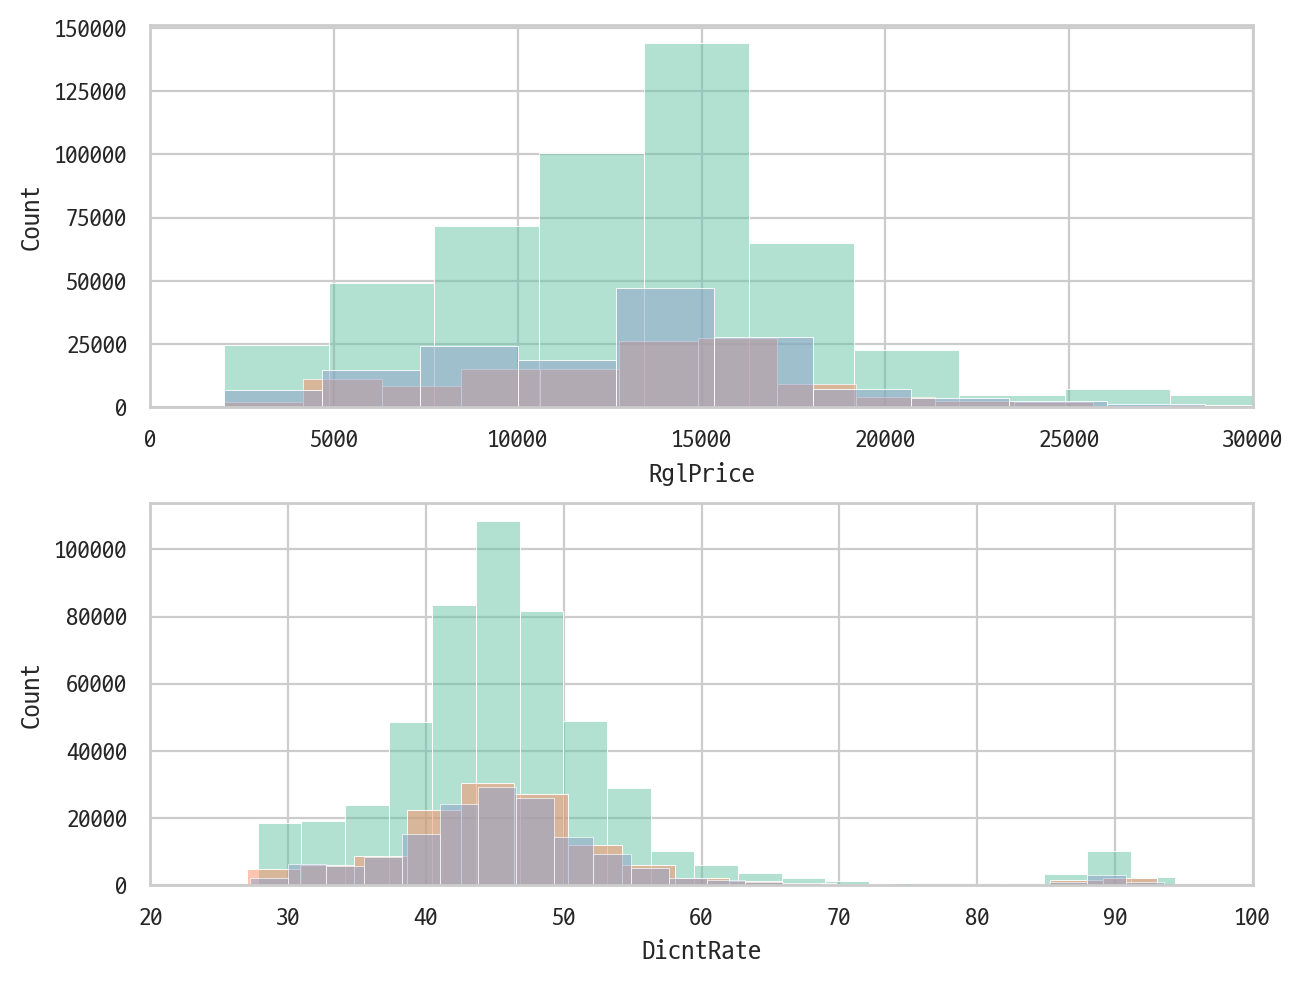

In [24]:
fig,ax = plt.subplots(2,1)
for mode,sample in data.items():
    sns.histplot(sample['X']['RglPrice'],ax=ax[0],alpha=0.5,bins=100)
ax[0].set_xlim([0,30000])
for n,(mode,sample) in enumerate(data.items()):
    sns.histplot(data = sample['X'], x= 'DicntRate',ax=ax[1],alpha=0.5,bins=100)
ax[1].set_xlim([20,100])
pass

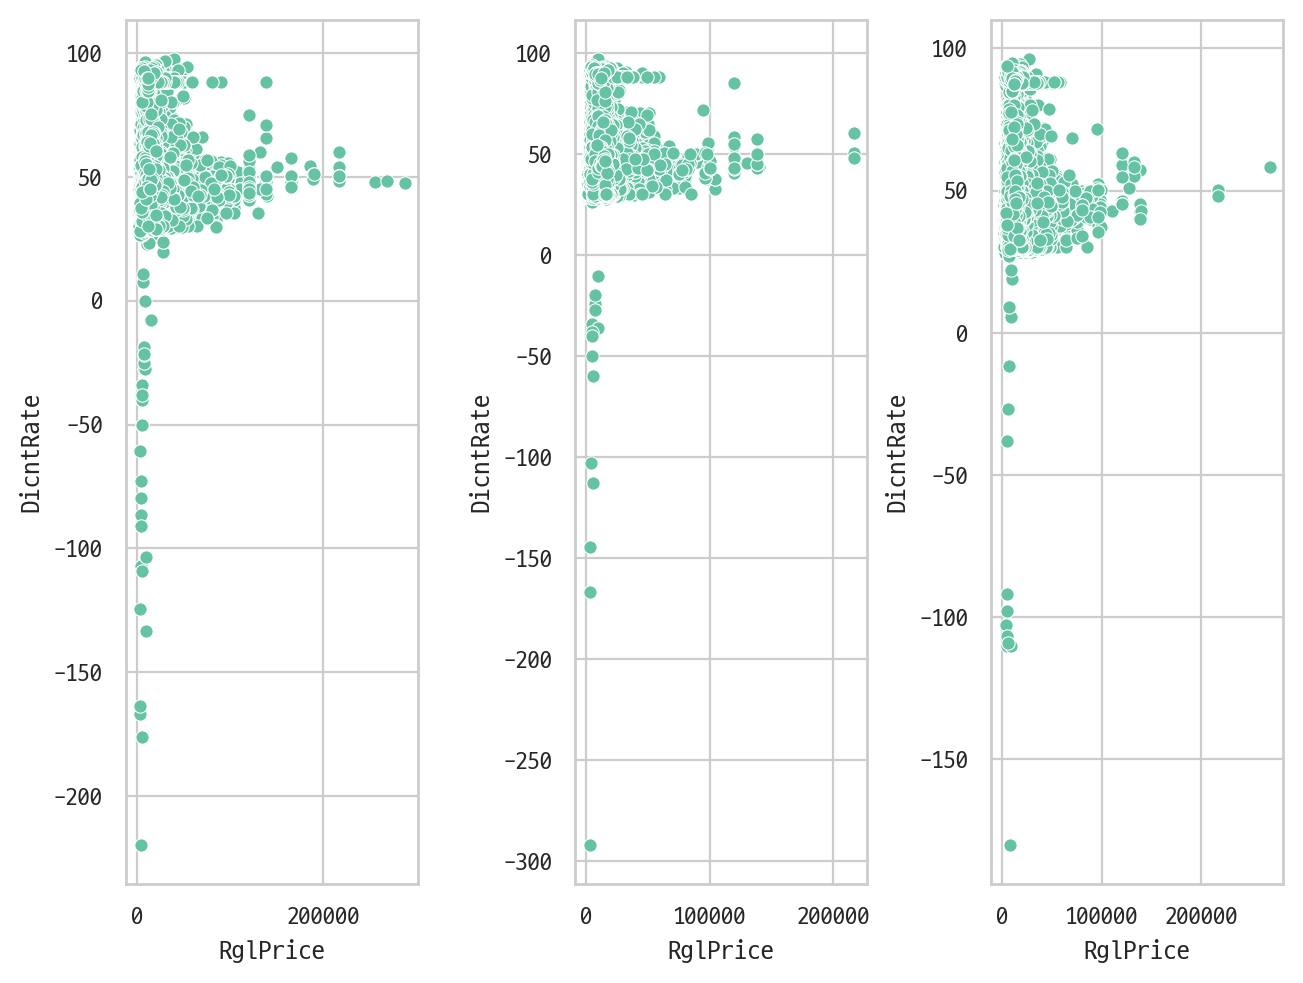

In [27]:
fig,axes = plt.subplots(1,3)
for (mode,sample),ax in zip(data.items(),axes.flatten()):
    sns.scatterplot(data = sample['X'],x='RglPrice',y='DicntRate',ax=ax)
pass

price나 discount rate로 stratify 한다고 해서 학습 결과가 바뀔 상황은 아닌 것 같음

**remove some col**
- -1 : SalesPoint
- -2 : RglrPrice

In [28]:
#crop,crop_idx = False,[-1,-2]
#crop,crop_idx = True,[-2]
#crop,crop_idx = True,[-1]
crop,crop_idx = True,[-1,-2]
if crop :
    crop_idx2 = list(map(lambda x : X_train.shape[1]+x if x < 0 else x, crop_idx))
    crop_idx2 = sorted(crop_idx2,reverse=True)
    print(crop_idx2)
    for i in crop_idx2:
        X_train = np.hstack([X_train[:,:i],X_train[:,i+1:]])
        X_val = np.hstack([X_val[:,:i],X_val[:,i+1:]])
        X_test = np.hstack([X_test[:,:i],X_test[:,i+1:]])

[67, 66]


In [29]:
display(X_train.shape)
display(X_val.shape)
display(X_test.shape)
display(y_train.shape)
display(y_val.shape)
display(y_test.shape)

(501896, 66)

(125474, 66)

(156843, 66)

(501896,)

(125474,)

(156843,)

In [30]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

## RF

In [ ]:
model_rf = RandomForestRegressor()
model_rf.fit(X_train,y_dscnt['train'])

RandomForestRegressor()

In [ ]:
y_pred1 = model_rf.predict(X_train)
y_pred2 = model_rf.predict(X_val)
y_pred3 = model_rf.predict(X_test)

In [ ]:
display(y_pred1.shape)
display(y_train.shape)

(501896,)

(501896,)

In [ ]:
dict_data = {
    'train':{'X':X_train,'y':y_dscnt['train']},
    'val':{'X':X_val,'y':y_dscnt['val']},
    'test':{'X':X_test,'y':y_dscnt['test']},
}
dict_rslt = {
    'train':y_pred1,
    'val':y_pred2,
    'test':y_pred3,
}


In [ ]:
reg_score_dict = make_reg_score_entire(dict_data,dict_rslt,print_rslt=True)

train
r2 score : 0.78741
rmse_model : 4.86763 / rmse_base : 10.55702	 mape_model : 373871676205.27643 / mape_base : 0.14490	
------------------------------------------------------------------------------------------------------------------------------------------------------
val
r2 score : 0.77096
rmse_model : 5.09753 / rmse_base : 10.65125	 mape_model : 0.07781 / mape_base : 0.14531	
------------------------------------------------------------------------------------------------------------------------------------------------------
test
r2 score : 0.77234
rmse_model : 5.04366 / rmse_base : 10.57070	 mape_model : 0.07780 / mape_base : 0.14473	
------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
def plot_reg_score(dict_data,dict_rslt,dict_score):
    fig,axes = plt.subplots(len(dict_data),3,figsize=(15,4*len(dict_data)))
    for n, (col,data) in enumerate(dict_data.items()):
        ax_row = axes[n] if len(dict_data) > 1 else axes
        ax1, ax2, ax3 = ax_row[0], ax_row[1], ax_row[2]
        y_actual, y_pred = (data['y'], dict_rslt[col])
        train_y = dict_data['train']['y']
        base_pred = np.mean(train_y)

        sns.histplot(y_actual,label='actual',ax=ax1,alpha=0.5)
        sns.histplot(y_pred,label='pred',ax=ax1,alpha=0.5)
        ax1.legend(fontsize=9)

        sns.histplot(y_actual-base_pred,ax=ax2, label = 'baseline',alpha=0.5)
        sns.histplot(y_actual-y_pred,ax=ax2, label = 'pred',alpha=0.5)
        ax2.legend(fontsize=9)
        ax2.set_title('distribution of errors',fontsize=10)

        df_score = pd.DataFrame(dict_score[col]).T[[1,0]]
        xs = list(chain.from_iterable(repeat(val,2) for val in df_score.index))
        ax3r = ax3.twinx()
        sns.barplot(x=xs[:2],y=list(df_score.values.reshape(-1))[:2],
                    hue = ['pred','base']*1,ax=ax3,alpha=0.65,legend=False)
        sns.barplot(x=xs[2:],y=list(df_score.values.reshape(-1))[2:],
                    hue = ['pred','base']*3,ax=ax3r,alpha=0.8,legend=False)
        ax3r.set_ylim([0.0,1.15])
        ax3r.bar_label(ax3r.containers[0], fontsize=8, fmt='%.4f')
        ax3r.bar_label(ax3r.containers[1], fontsize=8, fmt='%.4f')
        ax3.grid(False)
        ax3r.grid(False)
        ax3r.set_yscale('linear')
        ax3.bar_label(ax3.containers[0], fontsize=8, fmt='%.4f')
        ax3.bar_label(ax3.containers[1], fontsize=8, fmt='%.4f')
        ax3.set_title('model score',fontsize=10)

        ax1.set_title(str_cutter(col+':distribution of data',50),fontsize=15,loc='left',ha='left')
        ax2.xaxis.set_label_coords(-0.02, -0.15)
        ax2.set_xlabel('rmse_model : {:.3f} | rmse_base : {:.3f}\nr2 score : {:.3f} {:>48}\n'.format(*dict_score[col]['rmse'],dict_score[col]['r2_score'][0],
            f'n = {len(y_actual)}'), fontsize=10,ha ='left')
        ax1.set_xlabel('')
        ax3.set_xlabel('')
        ax1.set_ylabel('count',fontsize =10)
        ax2.set_ylabel('count',fontsize =10)
        plt.setp(ax3.get_yticklabels(),rotation = 0, fontsize = 9, color='#333333')
        plt.setp(ax3r.get_yticklabels(),rotation = 0, fontsize = 9)

    for ax in axes.flatten():
        plt.setp(ax.get_yticklabels(),rotation = 0, fontsize = 9)
        plt.setp(ax.get_xticklabels(),ha ='center',rotation = 0, fontsize = 9)

    return fig, axes

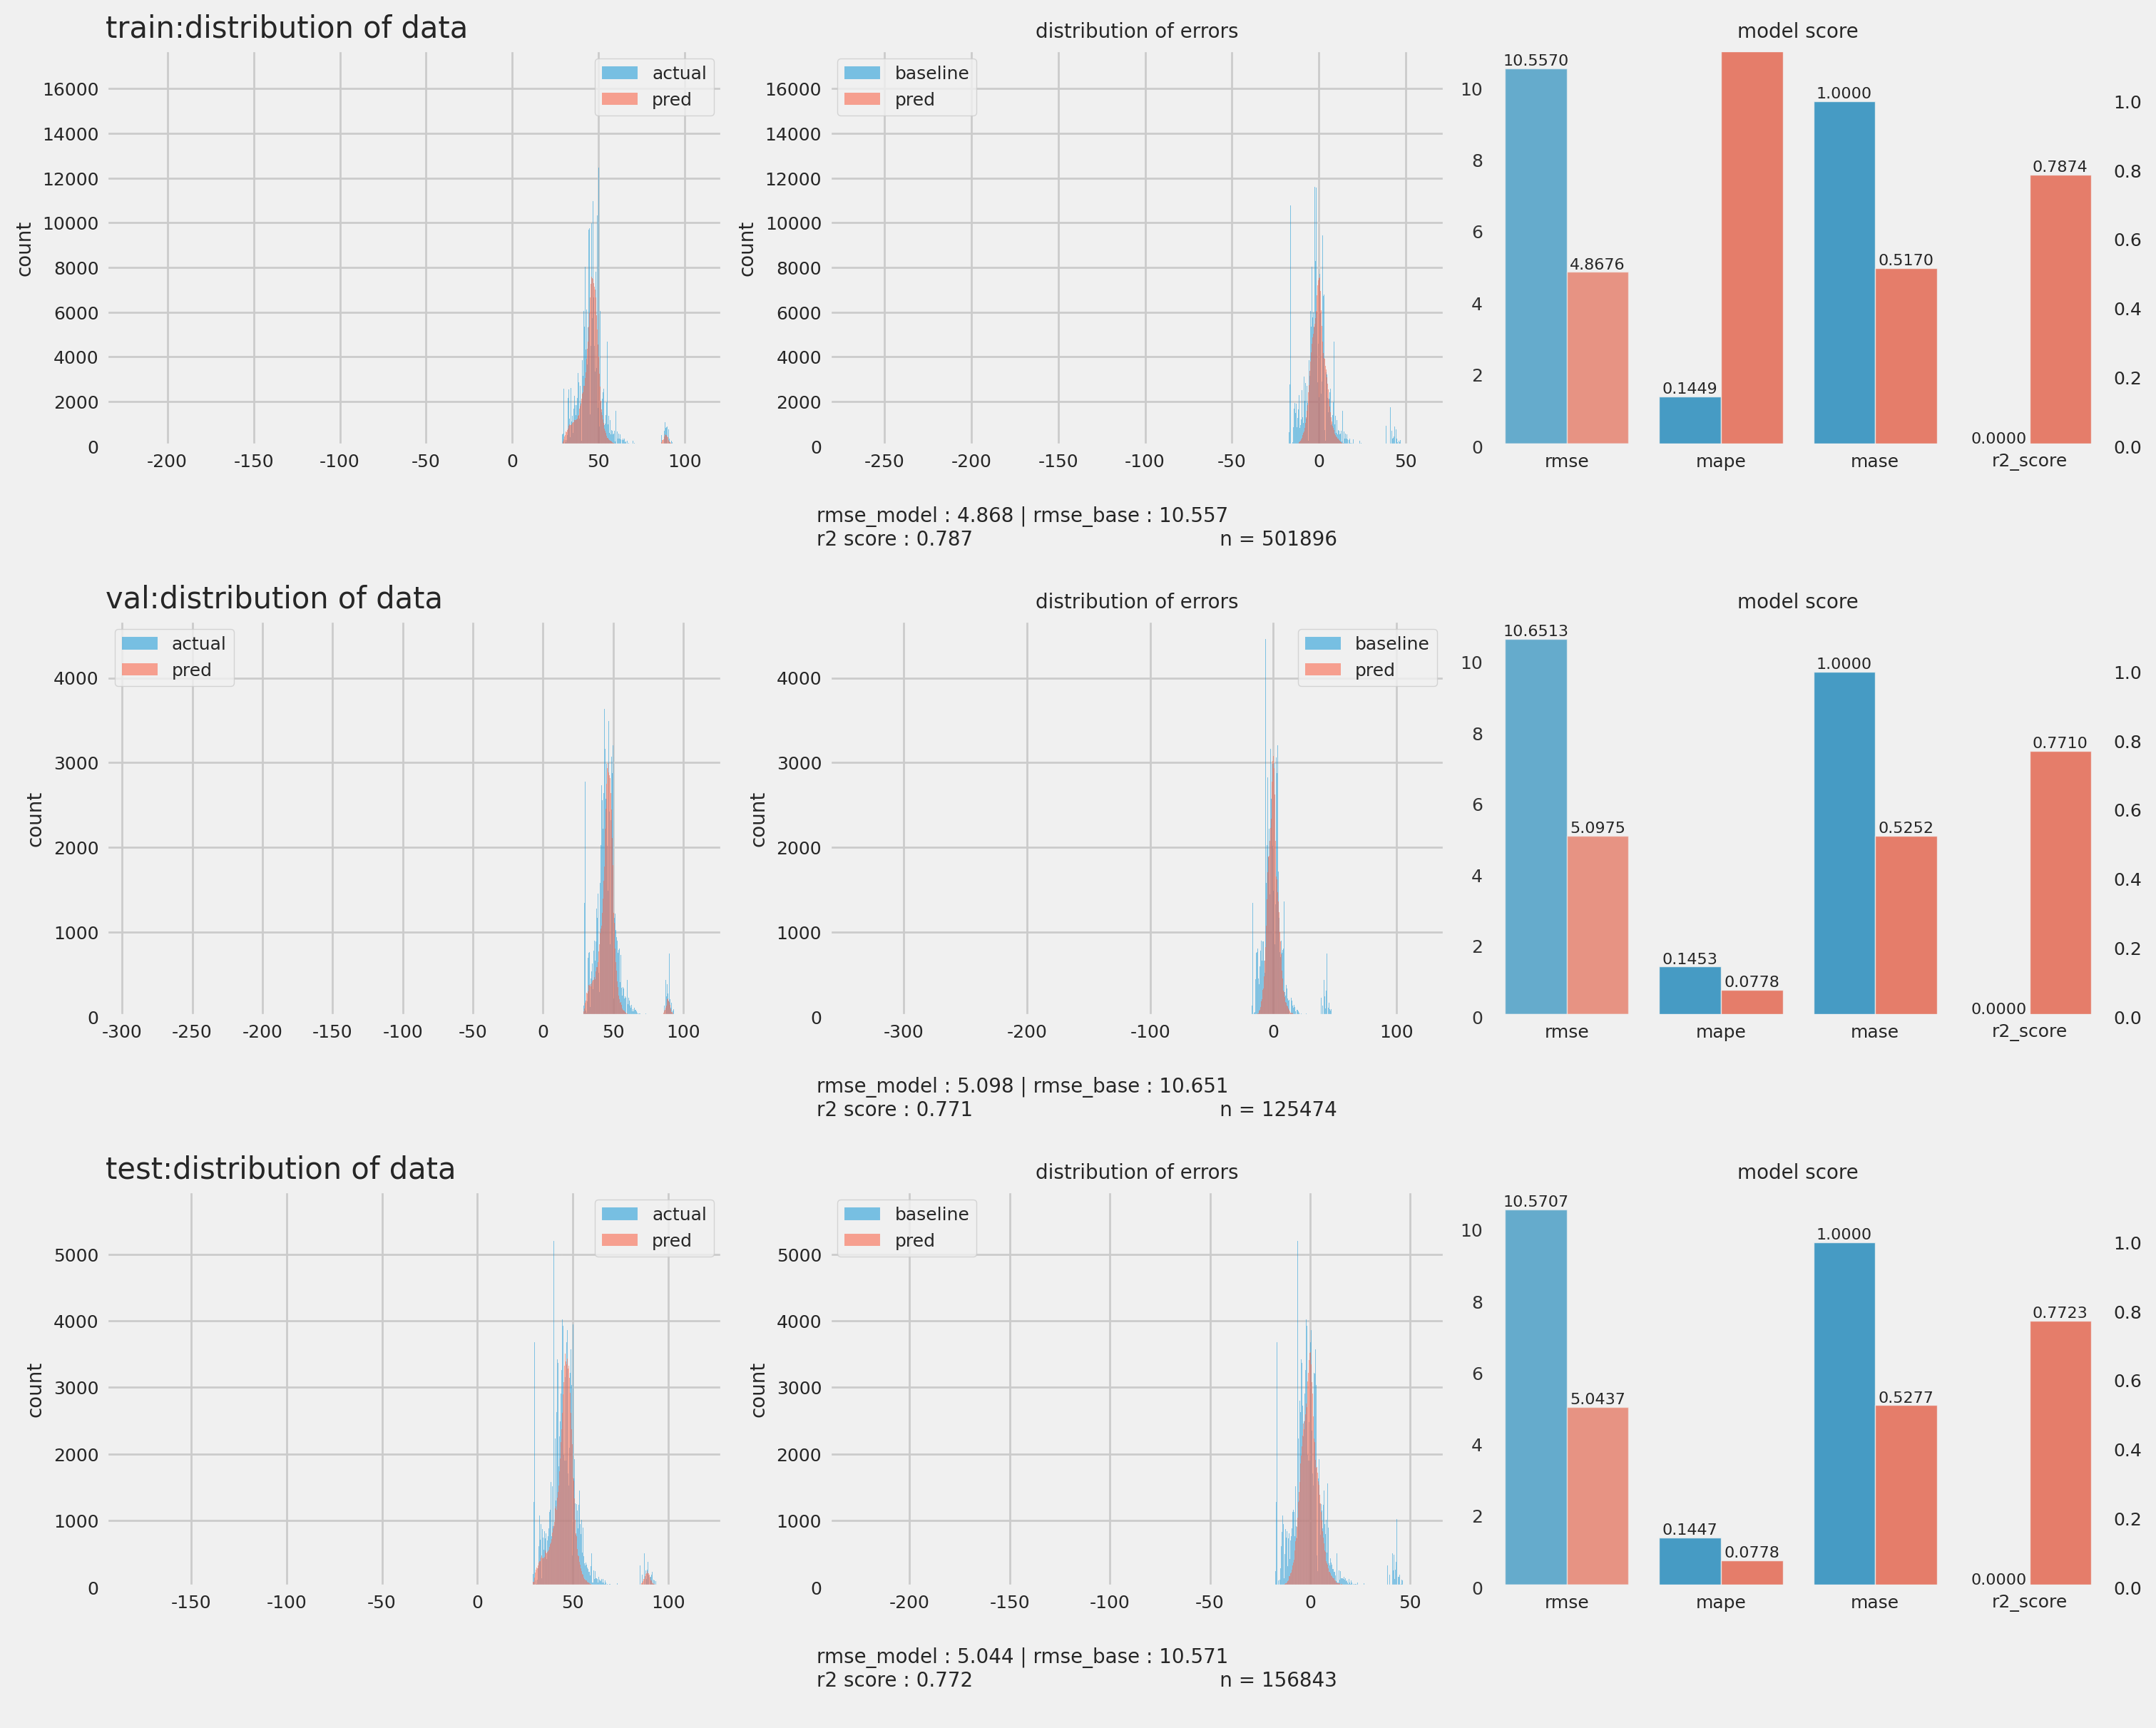

In [ ]:
plot_reg_score(dict_data,dict_rslt,reg_score_dict);

In [ ]:
rf_FI = model_rf.feature_importances_

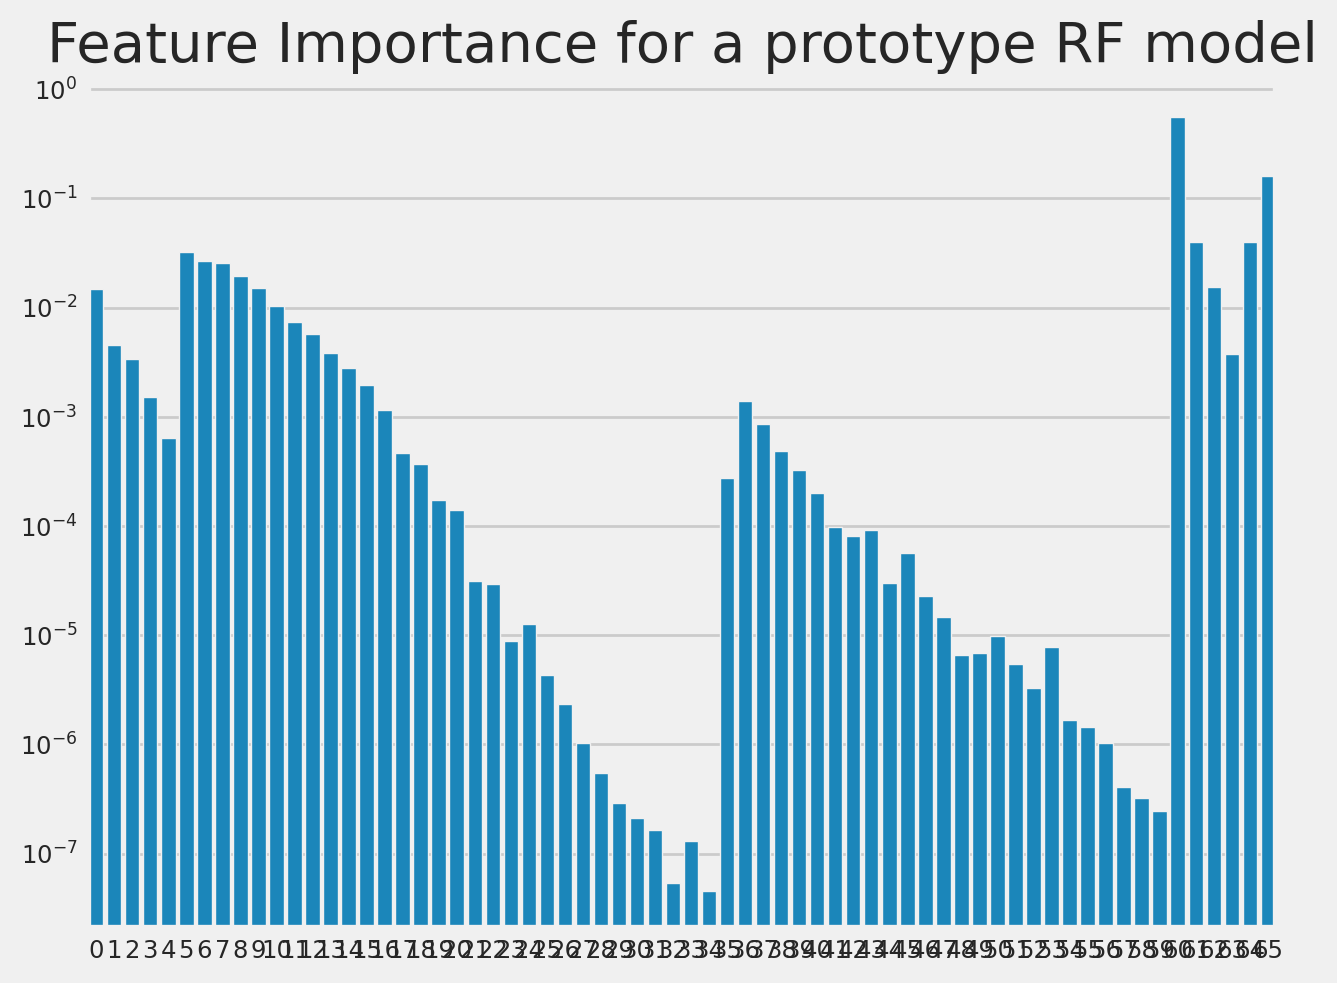

In [ ]:
fig,ax = plt.subplots()
sns.barplot(rf_FI,ax=ax)
ax.set_yscale('log')
ax.set_title('Feature Importance for a prototype RF model')
#ax.set_xticklabels([])
pass

- (0,5) : category
- (5,35) : BName
- (35,60) : BName_sub

In [ ]:
col_vector = ['Category','BName','BName_sub']

In [ ]:
crop, crop_idx

(True, [-1, -2])

In [ ]:
col_scalar=['quality',
 'store',
 'Author',
 'Author_mul',
 'Publshr'
 'Pdate',
 'RglPrice',
# 'SlsPrice',
 'SalesPoint']
#crop,crop_idx = True,[-1,-2]
if crop :
    crop_idx2 = list(map(lambda x : len(col_scalar)+x if x < 0 else x, crop_idx))
    crop_idx2 = sorted(crop_idx2,reverse=True)
    print(crop_idx2)
    for i in crop_idx2:
        col_scalar =col_scalar[:i]+col_scalar[i+1:]
col_scalar

[7, 6]


['quality', 'store', 'Author', 'Author_mul', 'Publshr', 'Pdate']

In [ ]:
col_partition = [(0,5),(5,35),(35,60)]+[(60+i,61+i) for i in range(len(col_scalar))]
col_partition

[(0, 5),
 (5, 35),
 (35, 60),
 (60, 61),
 (61, 62),
 (62, 63),
 (63, 64),
 (64, 65),
 (65, 66)]

In [ ]:
cols_setting = list(zip(col_vector+col_scalar,col_partition))
concatted_FI = dict()
for (col,partition) in cols_setting:
    concatted_FI[col] = np.sum(rf_FI[partition[0]:partition[1]])
concatted_FI, sum(list(concatted_FI.values()))

({'Category': 0.02505800630618835,
  'BName': 0.1541519571220229,
  'BName_sub': 0.003988976182450266,
  'quality': 0.5564295085476463,
  'store': 0.04011346719559346,
  'Author': 0.015317055750897642,
  'Author_mul': 0.003779386233687623,
  'Publshr': 0.0402728683081001,
  'Pdate': 0.16088877435341342},
 1.0)

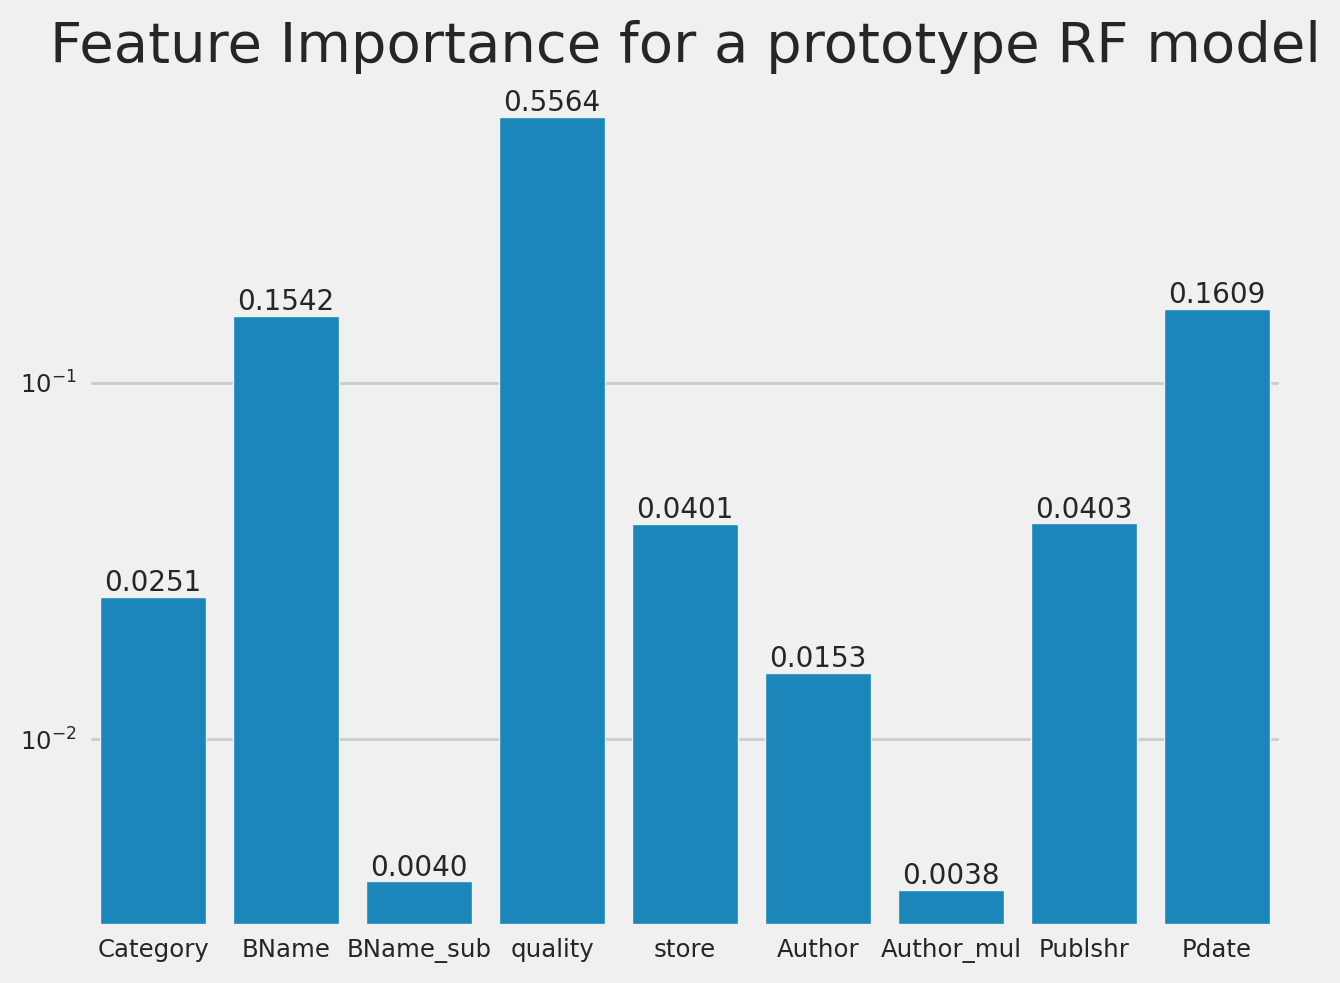

In [ ]:
fig,ax = plt.subplots()
sns.barplot(concatted_FI,ax=ax)
ax.set_yscale('log')
ax.set_title('Feature Importance for a prototype RF model')
ax.bar_label(ax.containers[0],fmt="%.4f", fontsize=10)
#ax.set_xticklabels([])
pass

Text(0.5, 1.0, 'distribution of absolute errors')

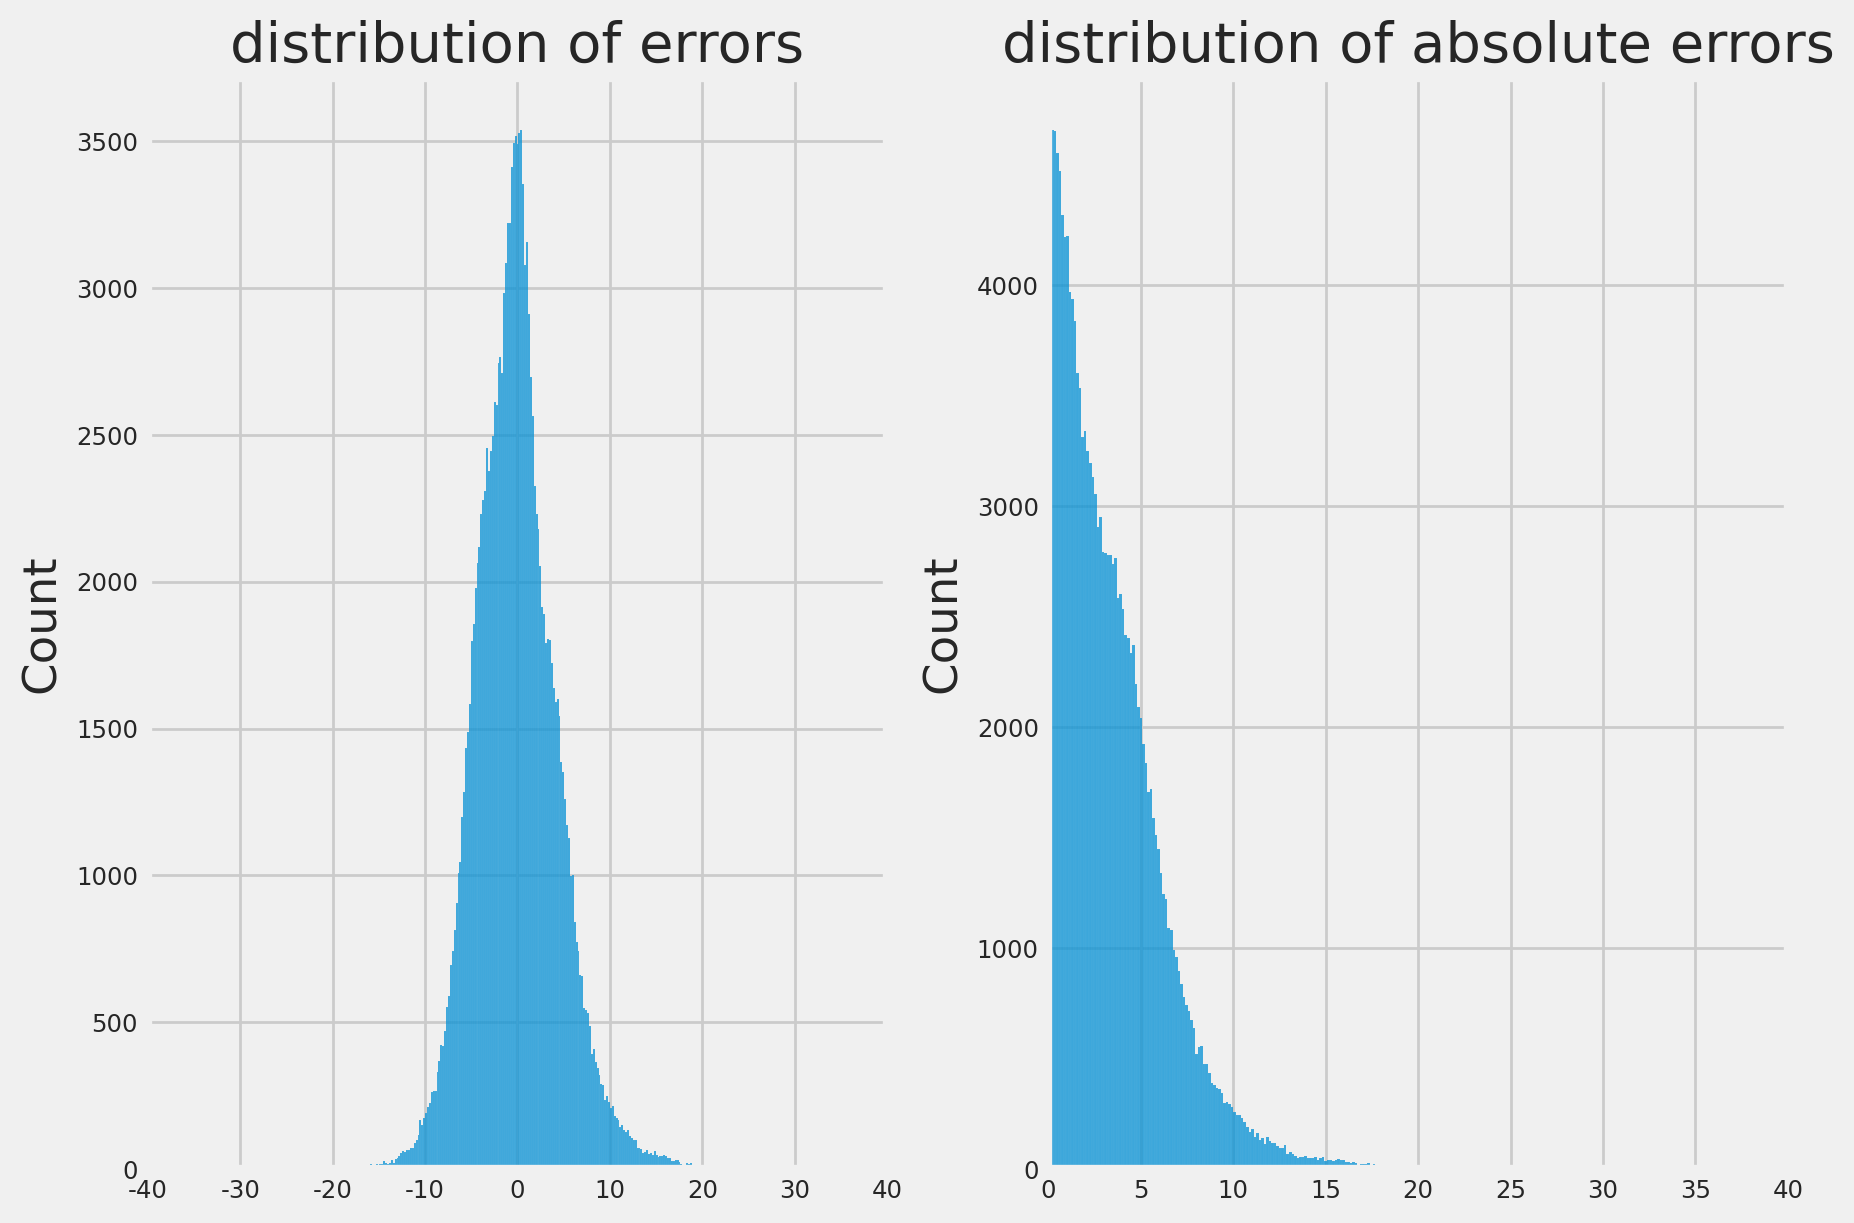

In [ ]:
fig,axes = plt.subplots(1,2,figsize = (9,6))
sns.histplot((dict_data['test']['y']-dict_rslt['test']),ax=axes[0])
axes[0].set_xlim([-40,40])
axes[0].set_title('distribution of errors')
sns.histplot(np.abs(dict_data['test']['y']-dict_rslt['test']),ax=axes[1])
axes[1].set_xlim([0,40])
axes[1].set_title('distribution of absolute errors')
#ax.set_yscale('log');

- 만약 ItemId가 포함되지 않은 것들로 test set을 추리면 어떻게 될까

In [ ]:
RSLT_DIR = PRJCT_PATH + 'processed/'
ver, strat = 1.0, False
file_name = 'data_splitted_ver{}_strat-{}.pkl'.format(ver,strat)
file_path = os.path.join(RSLT_DIR,file_name)
data = load_pkl(file_path)

file_name = 'bookinfo_ver{}.csv'.format(1.0)
file_path = os.path.join(RSLT_DIR,file_name)
bookinfo = pd.read_csv(file_path)

items=dict()
for mode,sample in data.items():
    items[mode]= set(sample['X']['ItemId'].values)

In [ ]:
display(len(items['val'].difference(items['train'])))
display(len(items['test'].difference(items['train'])))


4084

4984

In [ ]:
res_val = list(items['val'].difference(items['train']))
res_test = list(items['test'].difference(items['train']))
res_items = res_val+res_test
len(res_items)

9068

In [ ]:
cond_val_res = data['val']['X']['ItemId'].isin(res_val).to_numpy()
cond_test_res = data['test']['X']['ItemId'].isin(res_val).to_numpy()
display(np.sum(cond_val_res))
display(np.sum(cond_test_res))

4677

1451

In [ ]:
len(cond_val_res)

125474

In [ ]:
len(y_val[cond_val_res]),len(y_test[cond_test_res])

(4677, 1451)

In [ ]:
X_res = np.vstack((X_val[cond_val_res],X_test[cond_test_res]))
y_res = np.hstack((y_val[cond_val_res],y_test[cond_test_res]))
X_res.shape, y_res.shape

((6128, 66), (6128,))

In [ ]:
pred4 = model_rf.predict(X_res)

In [ ]:
make_reg_score_dict(y_res,pred4,np.mean(y_dscnt['train']))

{'rmse': [6.982217952716622, 15.359999183797157],
 'mape': [0.08677803342306258, 0.19571079918722184],
 'mase': [0.473379864420258, 1],
 'r2_score': [0.7765366062499118, 0]}

Text(0.5, 1.0, 'distribution of absolute errors')

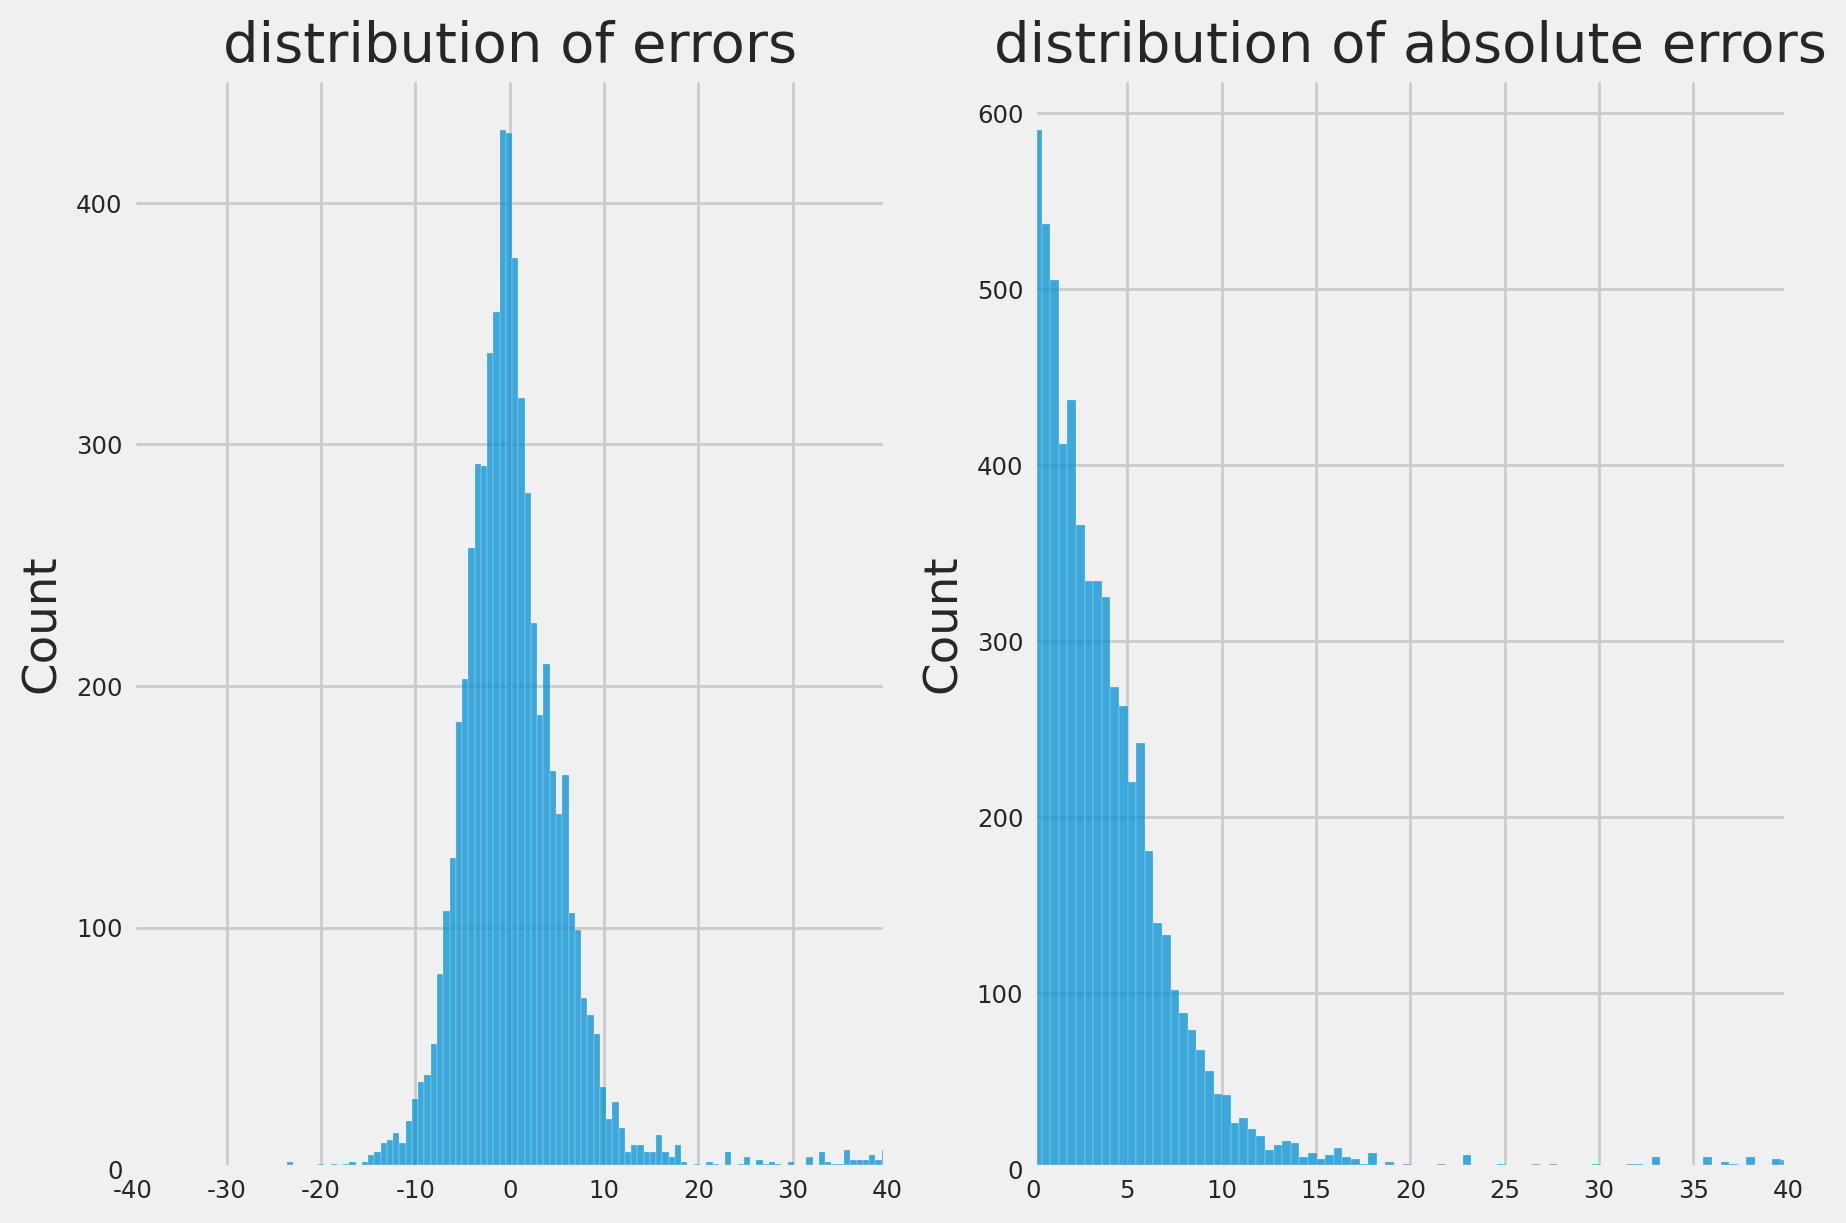

In [ ]:
fig,axes = plt.subplots(1,2,figsize = (9,6))
sns.histplot((y_res-pred4),ax=axes[0])
axes[0].set_xlim([-40,40])
axes[0].set_title('distribution of errors')
sns.histplot(np.abs(y_res-pred4),ax=axes[1])
axes[1].set_xlim([0,40])
axes[1].set_title('distribution of absolute errors')
#ax.set_yscale('log');

## XGB

In [32]:
model_xgb = XGBRegressor(tree_method="hist", device="cuda")

In [33]:
model_xgb.fit(X_train,y_dscnt['train'])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cuda', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [34]:
y_pred1 = model_xgb.predict(X_train)
y_pred2 = model_xgb.predict(X_val)
y_pred3 = model_xgb.predict(X_test)

In [35]:
display(y_pred1.shape)
display(y_dscnt['train'].shape)

(501896,)

(501896,)

In [36]:
dict_data = {
    'train':{'X':X_train,'y':y_dscnt['train']},
    'val':{'X':X_val,'y':y_dscnt['val']},
    'test':{'X':X_test,'y':y_dscnt['test']},
}
dict_rslt = {
    'train':y_pred1,
    'val':y_pred2,
    'test':y_pred3,
}


In [37]:
reg_score_dict = make_reg_score_entire(dict_data,dict_rslt,print_rslt=True)

train
r2 score : 0.75805
rmse_model : 5.19283 / rmse_base : 10.55702	 mape_model : 376995158088.06226 / mape_base : 0.14490	
------------------------------------------------------------------------------------------------------------------------------------------------------
val
r2 score : 0.74525
rmse_model : 5.37595 / rmse_base : 10.65125	 mape_model : 0.08283 / mape_base : 0.14531	
------------------------------------------------------------------------------------------------------------------------------------------------------
test
r2 score : 0.74645
rmse_model : 5.32274 / rmse_base : 10.57070	 mape_model : 0.08278 / mape_base : 0.14473	
------------------------------------------------------------------------------------------------------------------------------------------------------


In [38]:
def plot_reg_score(dict_data,dict_rslt,dict_score):
    fig,axes = plt.subplots(len(dict_data),3,figsize=(15,4*len(dict_data)))
    for n, (col,data) in enumerate(dict_data.items()):
        ax_row = axes[n] if len(dict_data) > 1 else axes
        ax1, ax2, ax3 = ax_row[0], ax_row[1], ax_row[2]
        y_actual, y_pred = (data['y'], dict_rslt[col])
        train_y = dict_data['train']['y']
        base_pred = np.mean(train_y)

        sns.histplot(y_actual,label='actual',ax=ax1,alpha=0.5)
        sns.histplot(y_pred,label='pred',ax=ax1,alpha=0.5)
        ax1.legend(fontsize=9)

        sns.histplot(y_actual-base_pred,ax=ax2, label = 'baseline',alpha=0.5)
        sns.histplot(y_actual-y_pred,ax=ax2, label = 'pred',alpha=0.5)
        ax2.legend(fontsize=9)
        ax2.set_title('distribution of errors',fontsize=10)

        df_score = pd.DataFrame(dict_score[col]).T[[1,0]]
        xs = list(chain.from_iterable(repeat(val,2) for val in df_score.index))
        ax3r = ax3.twinx()
        sns.barplot(x=xs[:2],y=list(df_score.values.reshape(-1))[:2],
                    hue = ['pred','base']*1,ax=ax3,alpha=0.65,legend=False)
        sns.barplot(x=xs[2:],y=list(df_score.values.reshape(-1))[2:],
                    hue = ['pred','base']*3,ax=ax3r,alpha=0.8,legend=False)
        ax3r.set_ylim([0.0,1.15])
        ax3r.bar_label(ax3r.containers[0], fontsize=8, fmt='%.4f')
        ax3r.bar_label(ax3r.containers[1], fontsize=8, fmt='%.4f')
        ax3.grid(False)
        ax3r.grid(False)
        ax3r.set_yscale('linear')
        ax3.bar_label(ax3.containers[0], fontsize=8, fmt='%.4f')
        ax3.bar_label(ax3.containers[1], fontsize=8, fmt='%.4f')
        ax3.set_title('model score',fontsize=10)

        ax1.set_title(str_cutter(col+':distribution of data',50),fontsize=15,loc='left',ha='left')
        ax2.xaxis.set_label_coords(-0.02, -0.15)
        ax2.set_xlabel('rmse_model : {:.3f} | rmse_base : {:.3f}\nr2 score : {:.3f} {:>48}\n'.format(*dict_score[col]['rmse'],dict_score[col]['r2_score'][0],
            f'n = {len(y_actual)}'), fontsize=10,ha ='left')
        ax1.set_xlabel('')
        ax3.set_xlabel('')
        ax1.set_ylabel('count',fontsize =10)
        ax2.set_ylabel('count',fontsize =10)
        plt.setp(ax3.get_yticklabels(),rotation = 0, fontsize = 9, color='#333333')
        plt.setp(ax3r.get_yticklabels(),rotation = 0, fontsize = 9)

    for ax in axes.flatten():
        plt.setp(ax.get_yticklabels(),rotation = 0, fontsize = 9)
        plt.setp(ax.get_xticklabels(),ha ='center',rotation = 0, fontsize = 9)

    return fig, axes

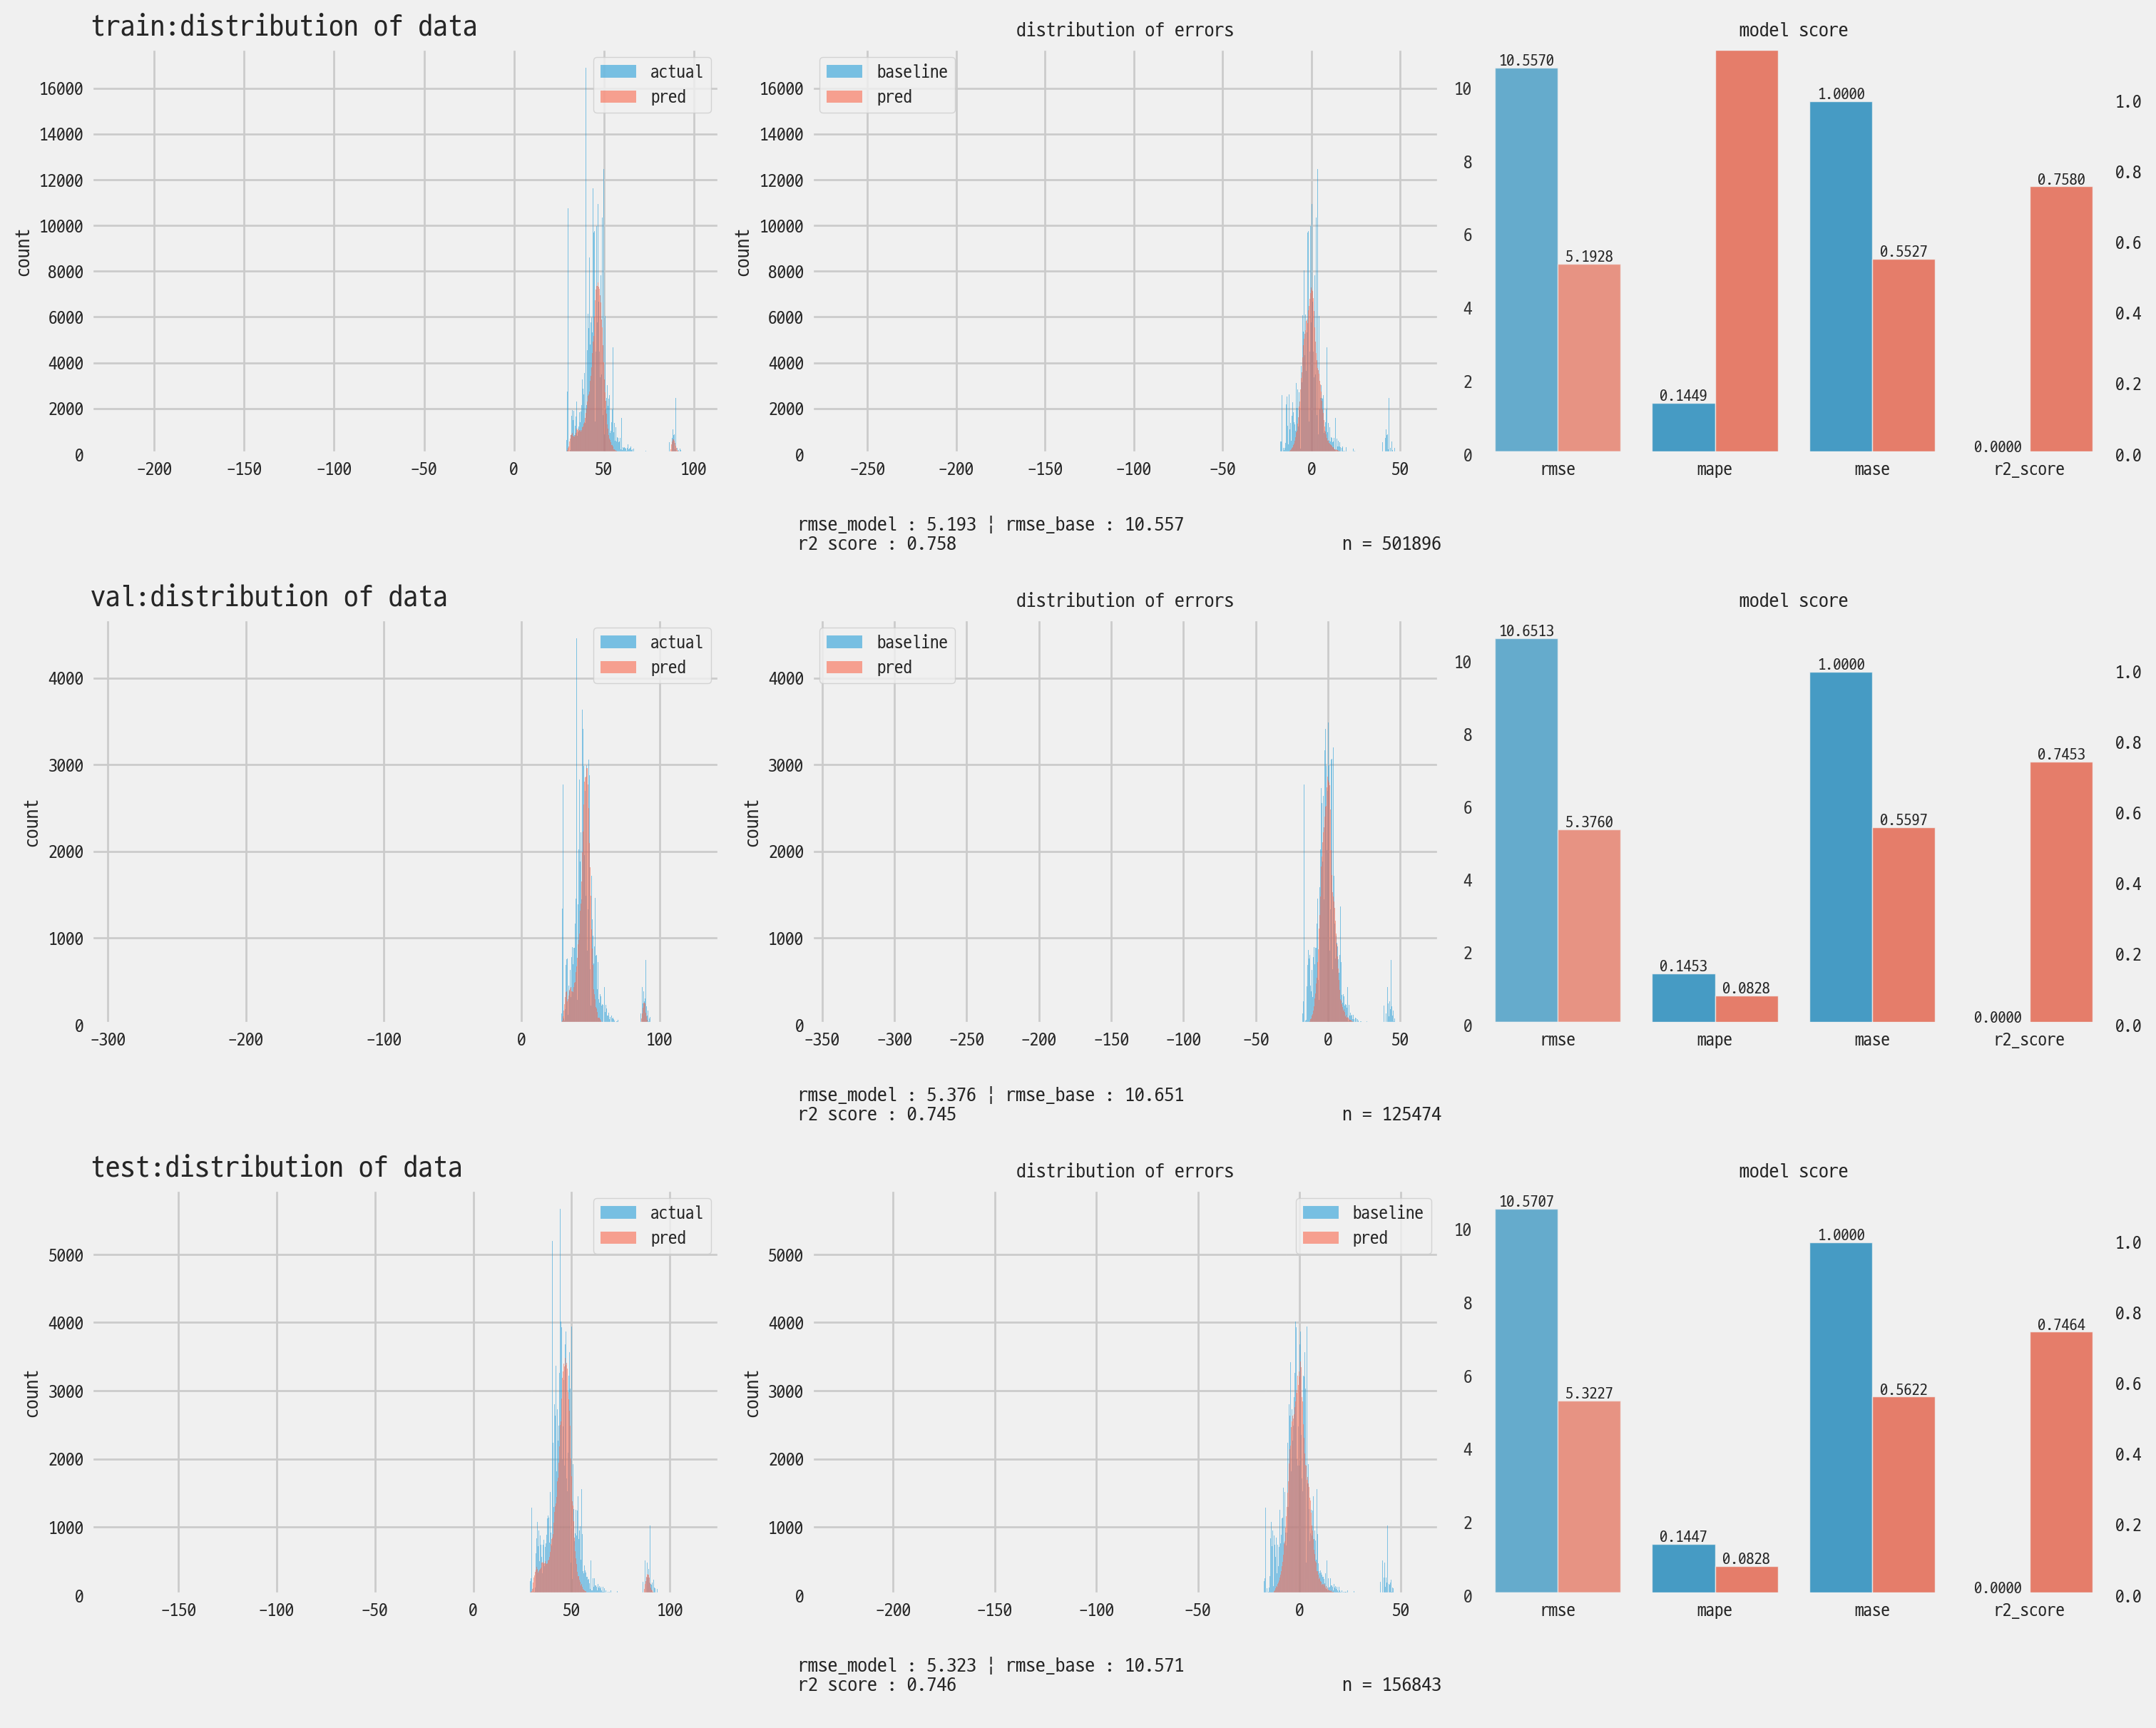

In [39]:
plot_reg_score(dict_data,dict_rslt,reg_score_dict);

- 만약 ItemId가 포함되지 않은 것들로 test set을 추리면 어떻게 될까

In [40]:
RSLT_DIR = PRJCT_PATH + 'processed/'
ver, strat = 1.0, False
file_name = 'data_splitted_ver{}_strat-{}.pkl'.format(ver,strat)
file_path = os.path.join(RSLT_DIR,file_name)
data = load_pkl(file_path)

file_name = 'bookinfo_ver{}.csv'.format(1.0)
file_path = os.path.join(RSLT_DIR,file_name)
bookinfo = pd.read_csv(file_path)

items=dict()
for mode,sample in data.items():
    items[mode]= set(sample['X']['ItemId'].values)

In [41]:
display(len(items['val'].difference(items['train'])))
display(len(items['test'].difference(items['train'])))


4084

4984

In [42]:
res_val = list(items['val'].difference(items['train']))
res_test = list(items['test'].difference(items['train']))
res_items = res_val+res_test
len(res_items)

9068

In [43]:
cond_val_res = data['val']['X']['ItemId'].isin(res_val).to_numpy()
cond_test_res = data['test']['X']['ItemId'].isin(res_val).to_numpy()
display(np.sum(cond_val_res))
display(np.sum(cond_test_res))

4677

1451

In [44]:
len(cond_val_res), len(cond_test_res)

(125474, 156843)

In [45]:
len(y_dscnt['val'][cond_val_res]),len(y_dscnt['test'][cond_test_res])

(4677, 1451)

In [46]:
X_res = np.vstack((X_val[cond_val_res],X_test[cond_test_res]))
y_res = np.hstack((y_dscnt['val'][cond_val_res],y_dscnt['test'][cond_test_res]))
X_res.shape, y_res.shape

((6128, 66), (6128,))

In [47]:
pred4 = model_xgb.predict(X_res)

In [48]:
make_reg_score_dict(y_res,pred4,np.mean(y_train))

{'rmse': [7.052139627677632, 7209.286147882232],
 'mape': [0.0915469839919768, 0.993025034900986],
 'mase': [0.0006280898543993377, 1],
 'r2_score': [0.772038559672138, 0]}

Text(0.5, 1.0, 'distribution of absolute errors')

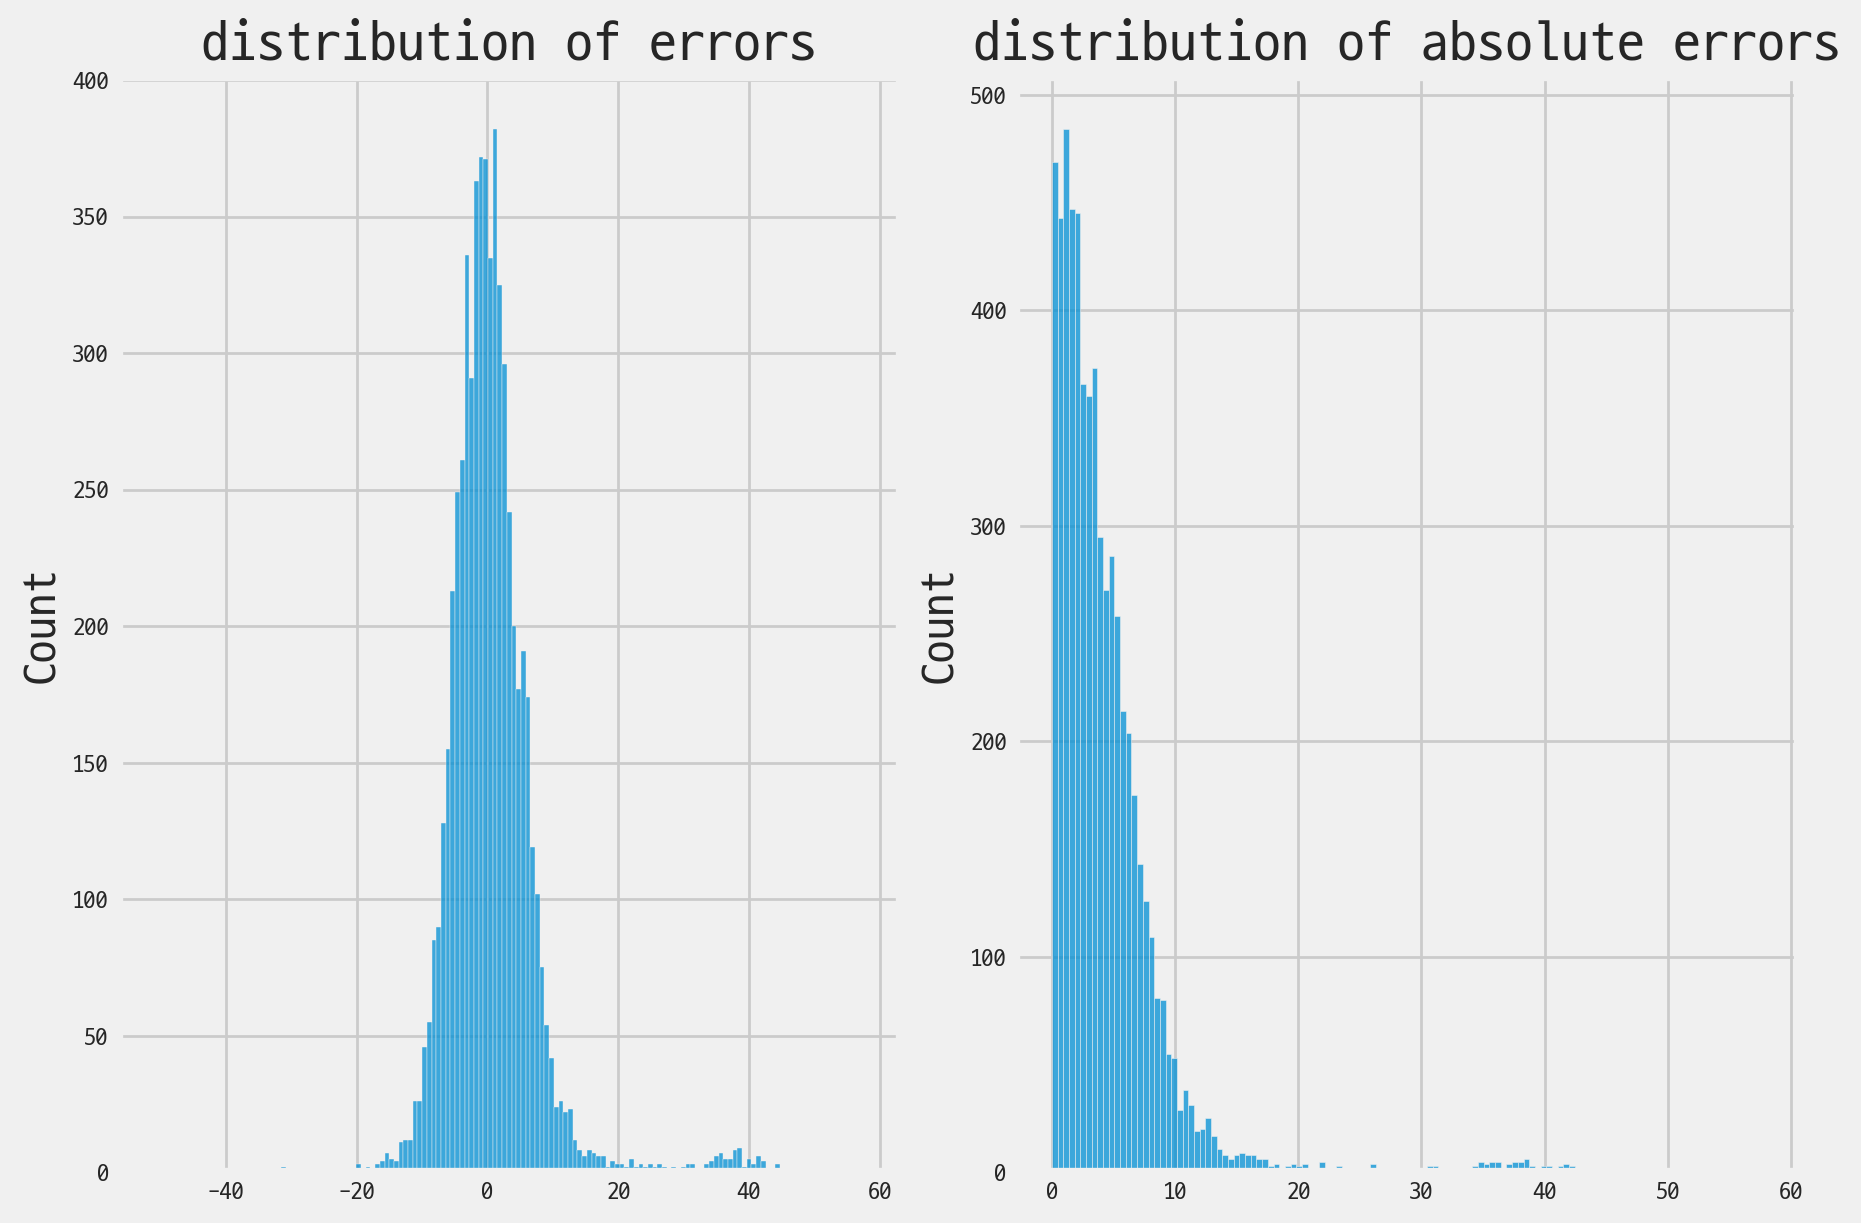

In [49]:
fig,axes = plt.subplots(1,2,figsize = (9,6))
sns.histplot((y_res-pred4),ax=axes[0])
#axes[0].set_xlim([-3000,3000])
axes[0].set_title('distribution of errors')
sns.histplot(np.abs(y_res-pred4),ax=axes[1])
#axes[1].set_xlim([0,3000])
axes[1].set_title('distribution of absolute errors')
#ax.set_yscale('log');

**predict sales rate with all features**

In [ ]:
data_type = 'whole'
ver=1.0
strat= False
X_train=load_pkl(os.path.join(dir_path,'{}.v{}_st-{}_X_train.pkl'.format(data_type,ver,strat)))
X_val=load_pkl(os.path.join(dir_path,'{}.v{}_st-{}_X_val.pkl'.format(data_type,ver,strat)))
X_test=load_pkl(os.path.join(dir_path,'{}.v{}_st-{}_X_test.pkl'.format(data_type,ver,strat)))
y_train=load_pkl(os.path.join(dir_path,'{}.v{}_st-{}_y_train.pkl'.format(data_type,ver,strat)))
y_val=load_pkl(os.path.join(dir_path,'{}.v{}_st-{}_y_val.pkl'.format(data_type,ver,strat)))
y_test=load_pkl(os.path.join(dir_path,'{}.v{}_st-{}_y_test.pkl'.format(data_type,ver,strat)))

In [ ]:
crop,crop_idx = False,[-1,-2]
#crop,crop_idx = True,[-2]
#crop,crop_idx = True,[-1]
#crop,crop_idx = True,[-1,-2]
if crop :
    crop_idx2 = list(map(lambda x : X_train.shape[1]+x if x < 0 else x, crop_idx))
    crop_idx2 = sorted(crop_idx2,reverse=True)
    print(crop_idx2)
    for i in crop_idx2:
        X_train = np.hstack([X_train[:,:i],X_train[:,i+1:]])
        X_val = np.hstack([X_val[:,:i],X_val[:,i+1:]])
        X_test = np.hstack([X_test[:,:i],X_test[:,i+1:]])

In [ ]:
display(X_train.shape)
display(X_val.shape)
display(X_test.shape)
display(y_train.shape)
display(y_val.shape)
display(y_test.shape)

(501896, 68)

(125474, 68)

(156843, 68)

(501896,)

(125474,)

(156843,)

In [ ]:
model_xgb = XGBRegressor(tree_method="hist", device="cuda")

In [ ]:
model_xgb.fit(X_train,y_dscnt['train'])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cuda', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred1 = model_xgb.predict(X_train)
y_pred2 = model_xgb.predict(X_val)
y_pred3 = model_xgb.predict(X_test)

In [ ]:
display(y_pred1.shape)
display(y_dscnt['train'].shape)

(501896,)

(501896,)

In [ ]:
dict_data = {
    'train':{'X':X_train,'y':y_dscnt['train']},
    'val':{'X':X_val,'y':y_dscnt['val']},
    'test':{'X':X_test,'y':y_dscnt['test']},
}
dict_rslt = {
    'train':y_pred1,
    'val':y_pred2,
    'test':y_pred3,
}


In [ ]:
reg_score_dict = make_reg_score_entire(dict_data,dict_rslt,print_rslt=True)

train
r2 score : 0.78741
rmse_model : 4.86763 / rmse_base : 10.55702	 mape_model : 373871676205.27643 / mape_base : 0.14490	
------------------------------------------------------------------------------------------------------------------------------------------------------
val
r2 score : 0.77096
rmse_model : 5.09753 / rmse_base : 10.65125	 mape_model : 0.07781 / mape_base : 0.14531	
------------------------------------------------------------------------------------------------------------------------------------------------------
test
r2 score : 0.77234
rmse_model : 5.04366 / rmse_base : 10.57070	 mape_model : 0.07780 / mape_base : 0.14473	
------------------------------------------------------------------------------------------------------------------------------------------------------


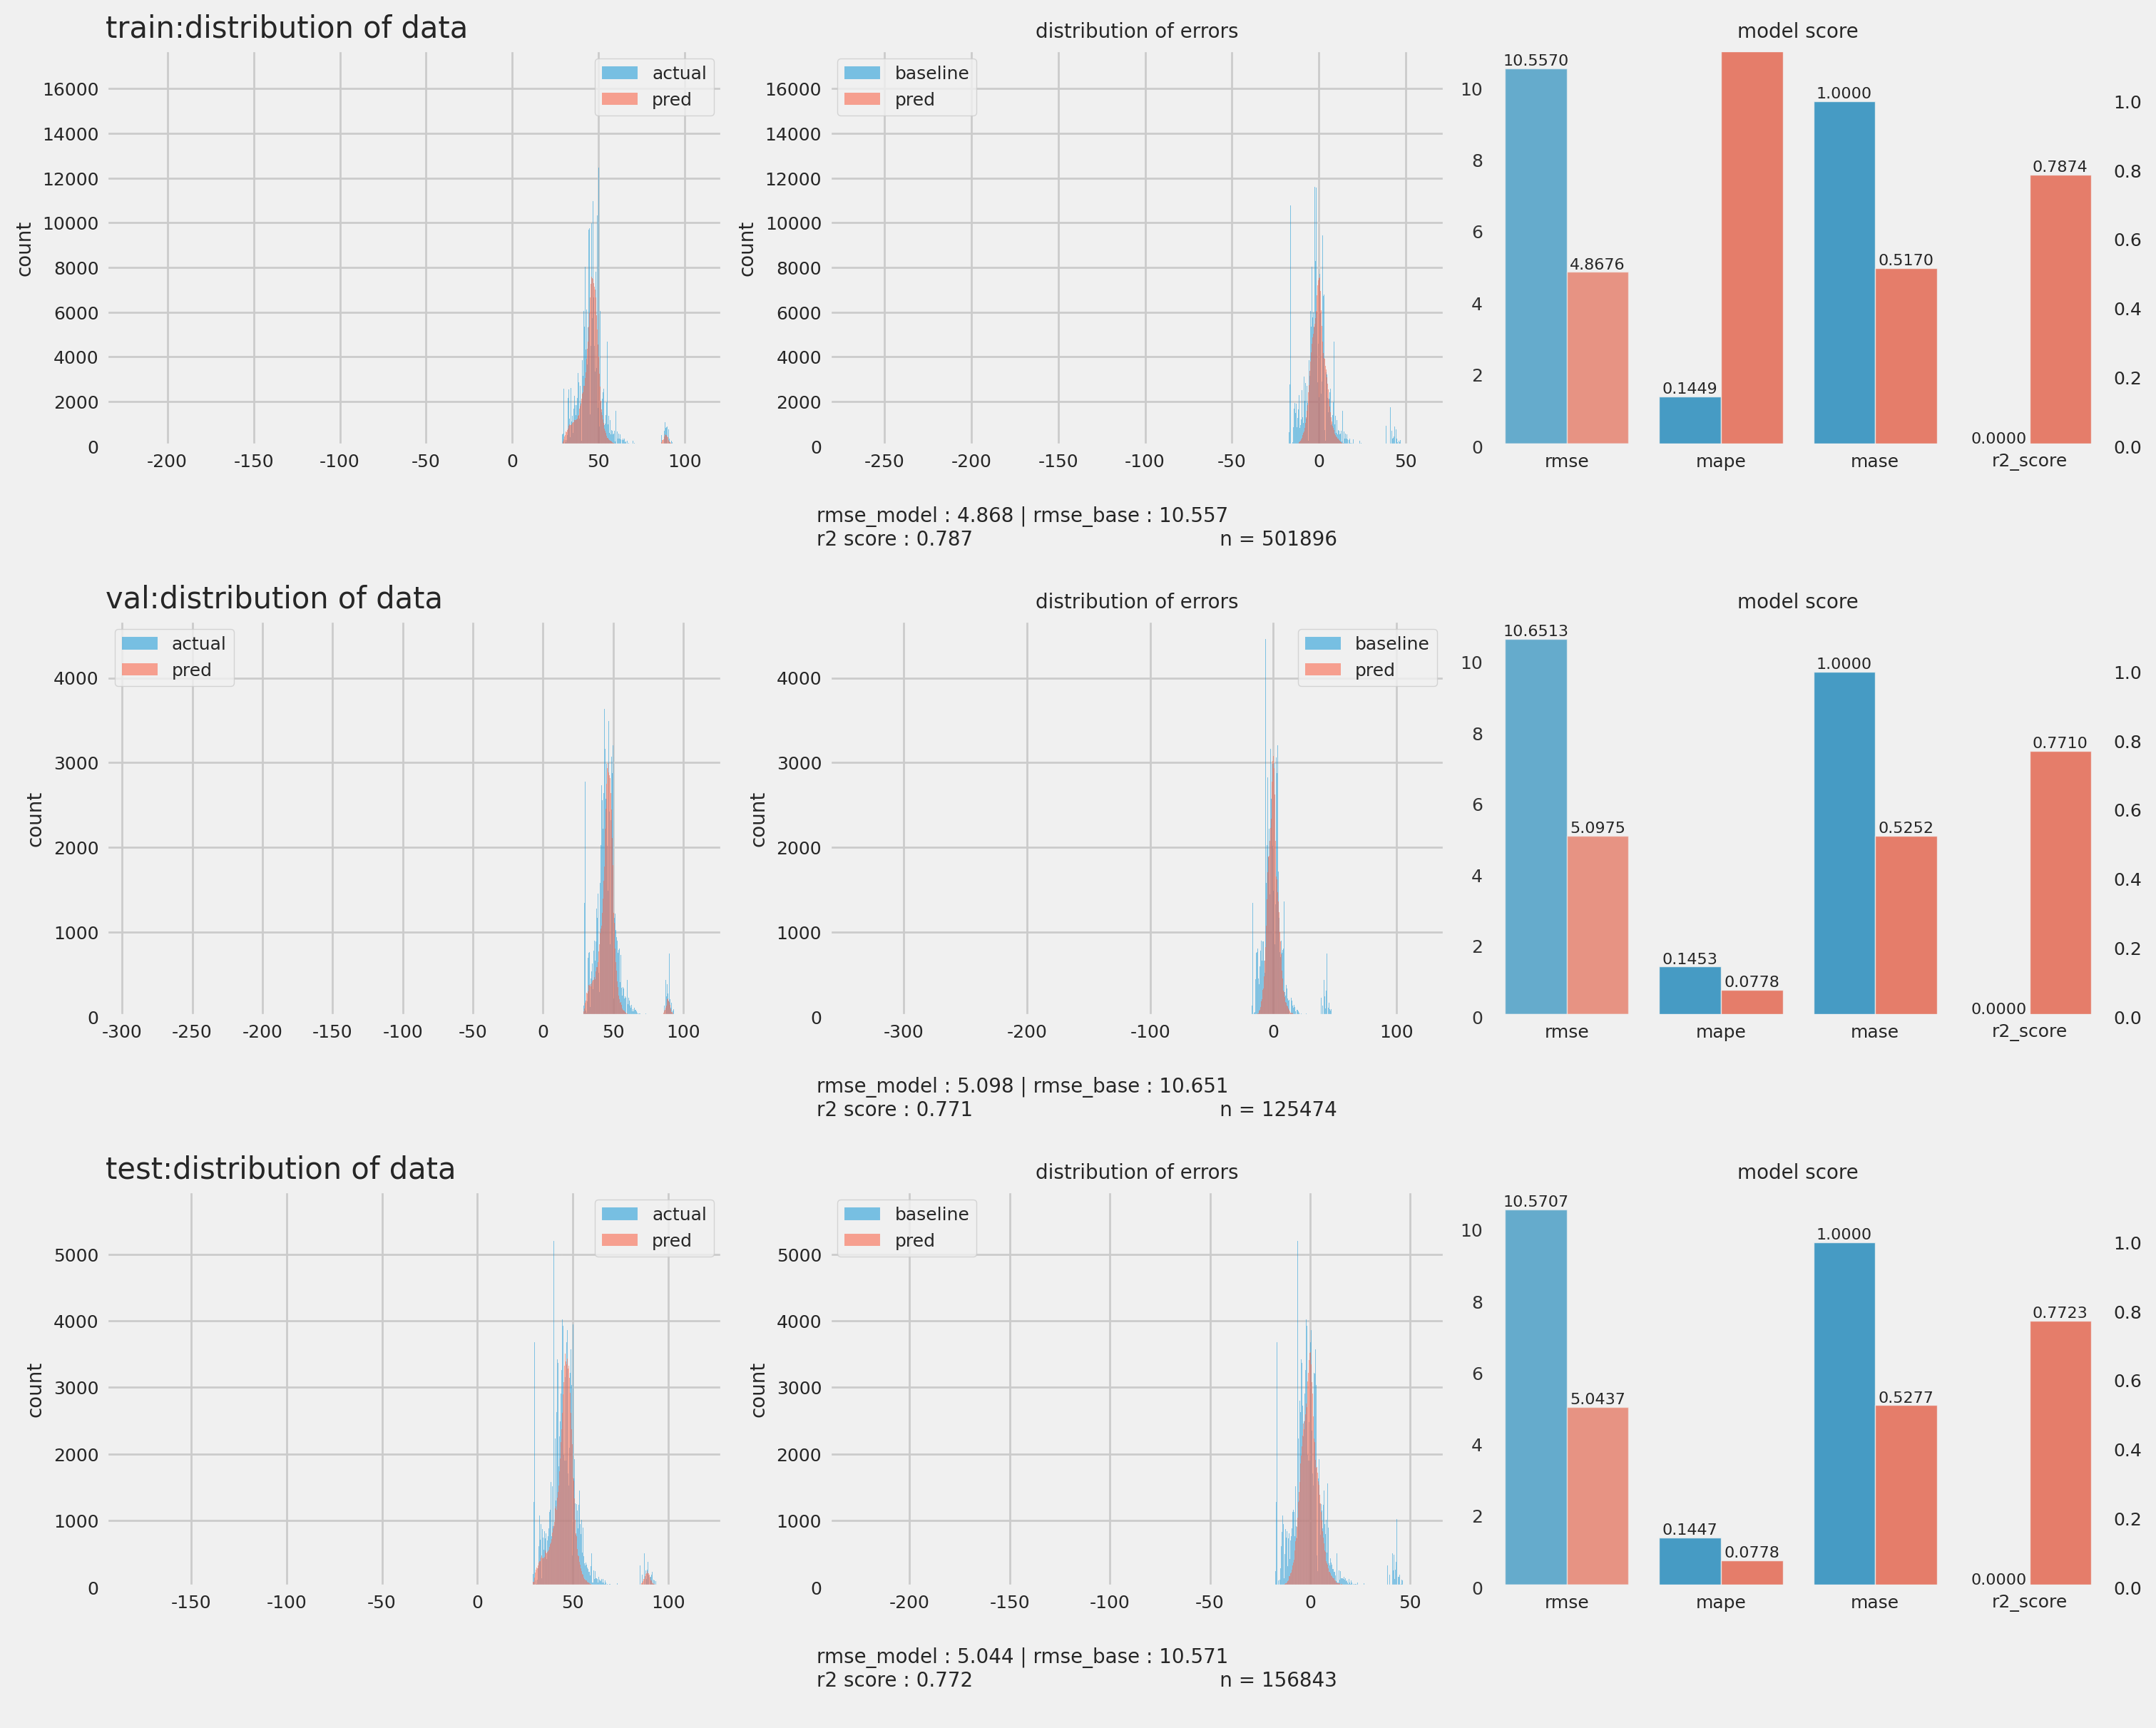

In [ ]:
plot_reg_score(dict_data,dict_rslt,reg_score_dict);

In [ ]:
X_res = np.vstack((X_val[cond_val_res],X_test[cond_test_res]))
y_res = np.hstack((y_dscnt['val'][cond_val_res],y_dscnt['test'][cond_test_res]))
X_res.shape, y_res.shape

((6128, 68), (6128,))

In [ ]:
pred4 = model_xgb.predict(X_res)

In [ ]:
make_reg_score_dict(y_res,pred4,np.mean(y_dscnt['train']))

{'rmse': [6.982217952716622, 15.359999183797157],
 'mape': [0.08677803342306258, 0.19571079918722184],
 'mase': [0.473379864420258, 1],
 'r2_score': [0.7765366062499118, 0]}

Text(0.5, 1.0, 'distribution of absolute errors')

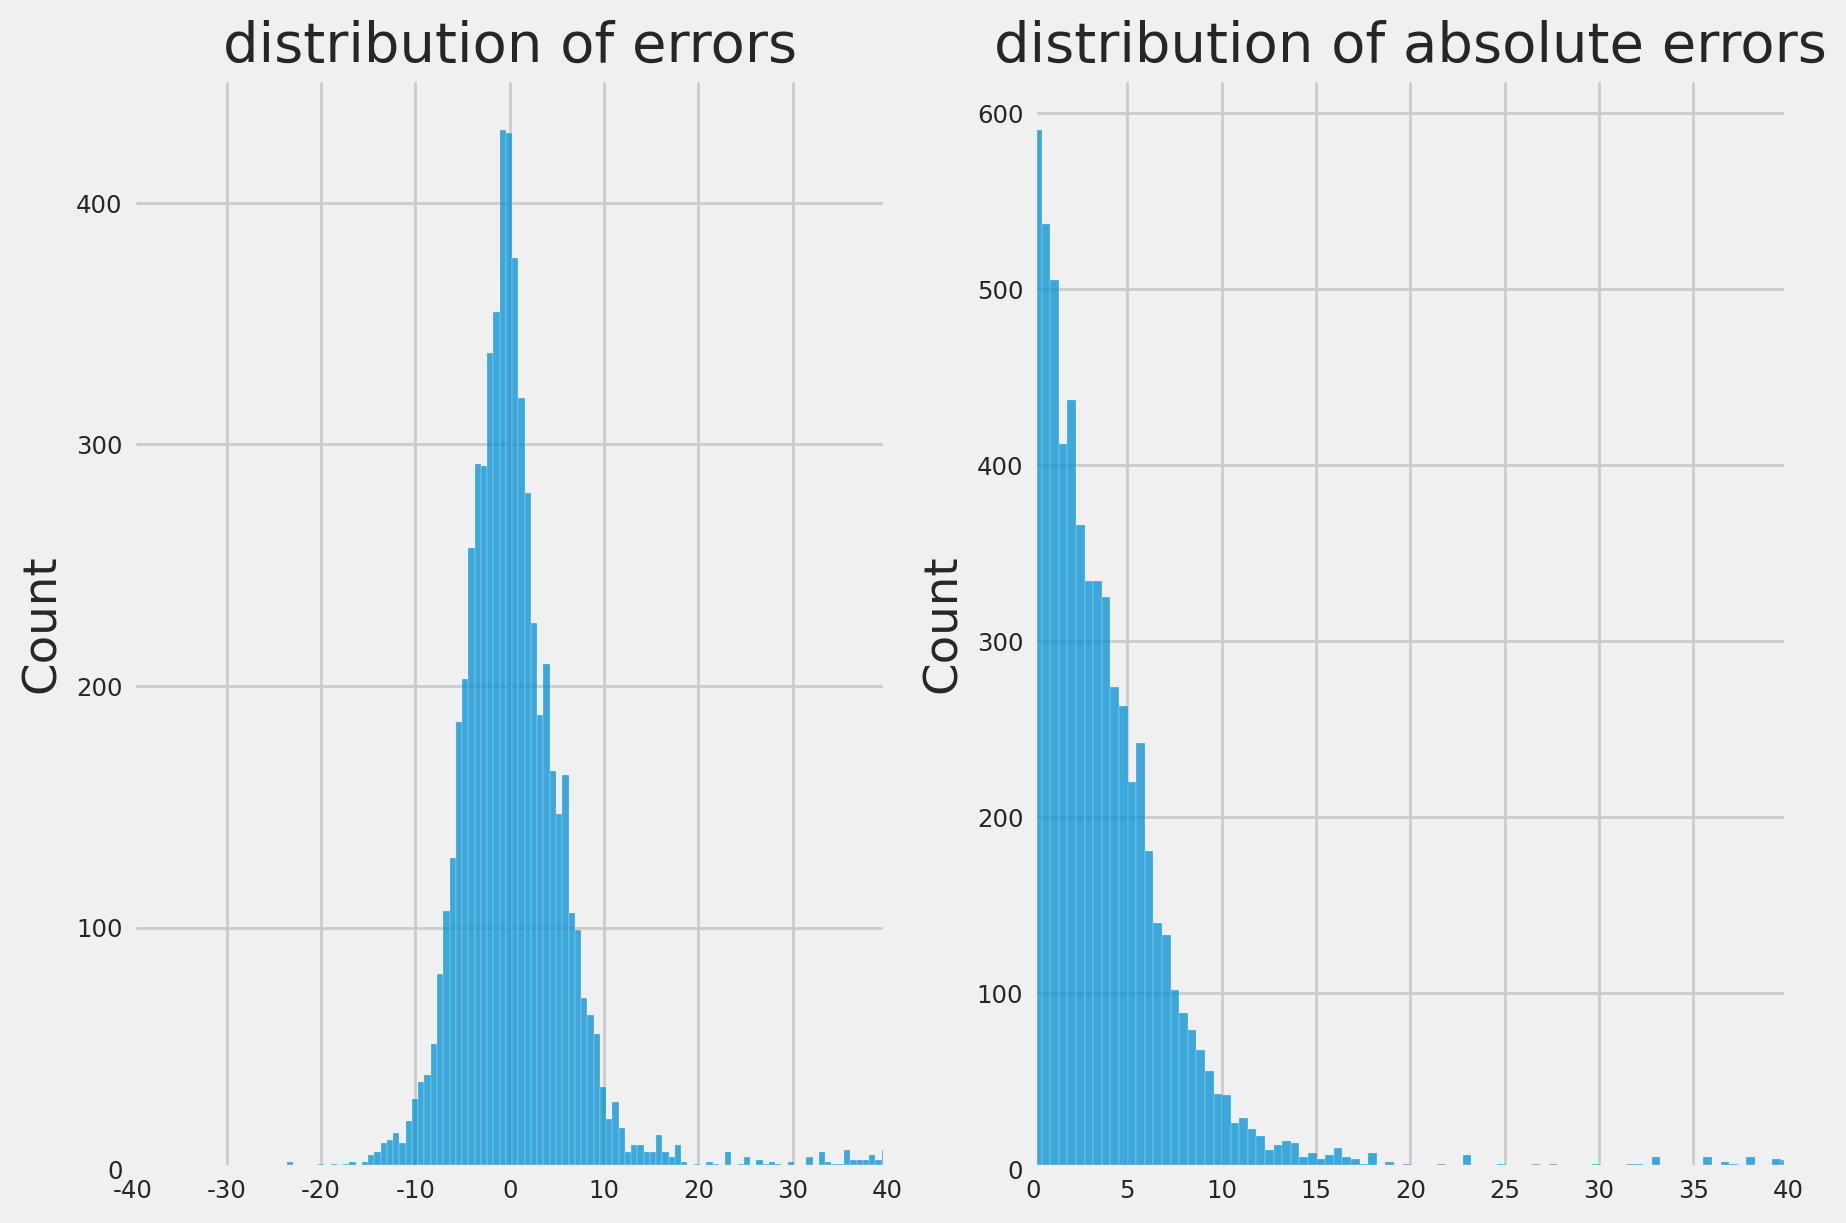

In [ ]:
fig,axes = plt.subplots(1,2,figsize = (9,6))
sns.histplot((y_res-pred4),ax=axes[0])
axes[0].set_xlim([-40,40])
axes[0].set_title('distribution of errors')
sns.histplot(np.abs(y_res-pred4),ax=axes[1])
axes[1].set_xlim([0,40])
axes[1].set_title('distribution of absolute errors')
#ax.set_yscale('log');

**grid search**

- use data without salespoint
  - I didn't check how much does SalesPoint affect to results, but it could be not that much and an estimation method of SalesPoint is not certain.
- use data with RglrPrice
  - It could not affect to result that much also, but I want to check the model trained with same hyperparameter as best model of prediction for discount rate, but predict for price, would have good score or not.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
h_params = {
    'n_estimators':[700,2100],
    'learning_rate':[100,10,1,0.5,0.1,0.05],
    'max_depth':[4,5],
    'colsample_bytree':[0.3,0.5,1],
    'device':['cuda']
}

In [ ]:
GS_XGB = GridSearchCV(model_xgb,param_grid=h_params,cv=2,n_jobs=-1,verbose=1)

In [ ]:
GS_XGB.fit(X_train,y_dscnt['train'])

GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device='cuda',
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.5, 1], 'device': ['cuda'],
                         'learning_rate': [100, 10, 1, 0.5, 0.1, 0.05],
                         'max_depth': [4, 5], 'n_estimators': [700, 2100]})

In [ ]:
display(GS_XGB.cv_results_['rank_test_score'])
great_idx = np.where(GS_XGB.cv_results_['rank_test_score']<8)
display(great_idx)
display(GS_XGB.cv_results_['mean_test_score'][great_idx])

array([65, 65, 71, 71, 51, 51, 57, 57, 35, 18, 27, 13, 30,  8, 17,  3, 45,
       32, 36, 15, 48, 39, 44, 29, 67, 67, 69, 69, 55, 55, 59, 59, 31, 14,
       21, 16, 24,  5,  9,  2, 43, 28, 34, 10, 47, 38, 42, 23, 61, 61, 63,
       63, 49, 49, 53, 53, 25, 11, 19, 12, 20,  4,  6,  1, 41, 26, 33,  7,
       46, 37, 40, 22], dtype=int32)

(array([15, 37, 39, 61, 62, 63, 67]),)

array([0.81656048, 0.80576058, 0.81946974, 0.80918652, 0.80457644,
       0.82057472, 0.80230287])

In [ ]:
best_idx = np.where(GS_XGB.cv_results_['rank_test_score']<5)
display(best_idx)
GS_XGB.cv_results_['mean_test_score'][best_idx]

(array([15, 39, 61, 63]),)

array([0.81656048, 0.81946974, 0.80918652, 0.82057472])

In [ ]:
list(map(lambda x: GS_XGB.cv_results_['params'][x],best_idx[0]))

[{'colsample_bytree': 0.3,
  'device': 'cuda',
  'learning_rate': 0.5,
  'max_depth': 5,
  'n_estimators': 2100},
 {'colsample_bytree': 0.5,
  'device': 'cuda',
  'learning_rate': 0.5,
  'max_depth': 5,
  'n_estimators': 2100},
 {'colsample_bytree': 1,
  'device': 'cuda',
  'learning_rate': 0.5,
  'max_depth': 4,
  'n_estimators': 2100},
 {'colsample_bytree': 1,
  'device': 'cuda',
  'learning_rate': 0.5,
  'max_depth': 5,
  'n_estimators': 2100}]

In [ ]:
best_idx = np.where(GS_XGB.cv_results_['rank_test_score']<2)
test_params = GS_XGB.cv_results_['params'][best_idx[0][0]]

In [ ]:
xgb_model = XGBRegressor(**test_params)
xgb_model.fit(X_train,y_dscnt['train'])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device='cuda', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
pred = xgb_model.predict(X_val)
make_reg_score_dict(y_dscnt['val'],pred,np.mean(y_dscnt['train']))

{'rmse': [4.296645859319557, 10.65125255485893],
 'mape': [0.059972689400329134, 0.14530679265828766],
 'mase': [0.40897977154795245, 1],
 'r2_score': [0.8372736562226577, 0]}

In [ ]:
import xgboost

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

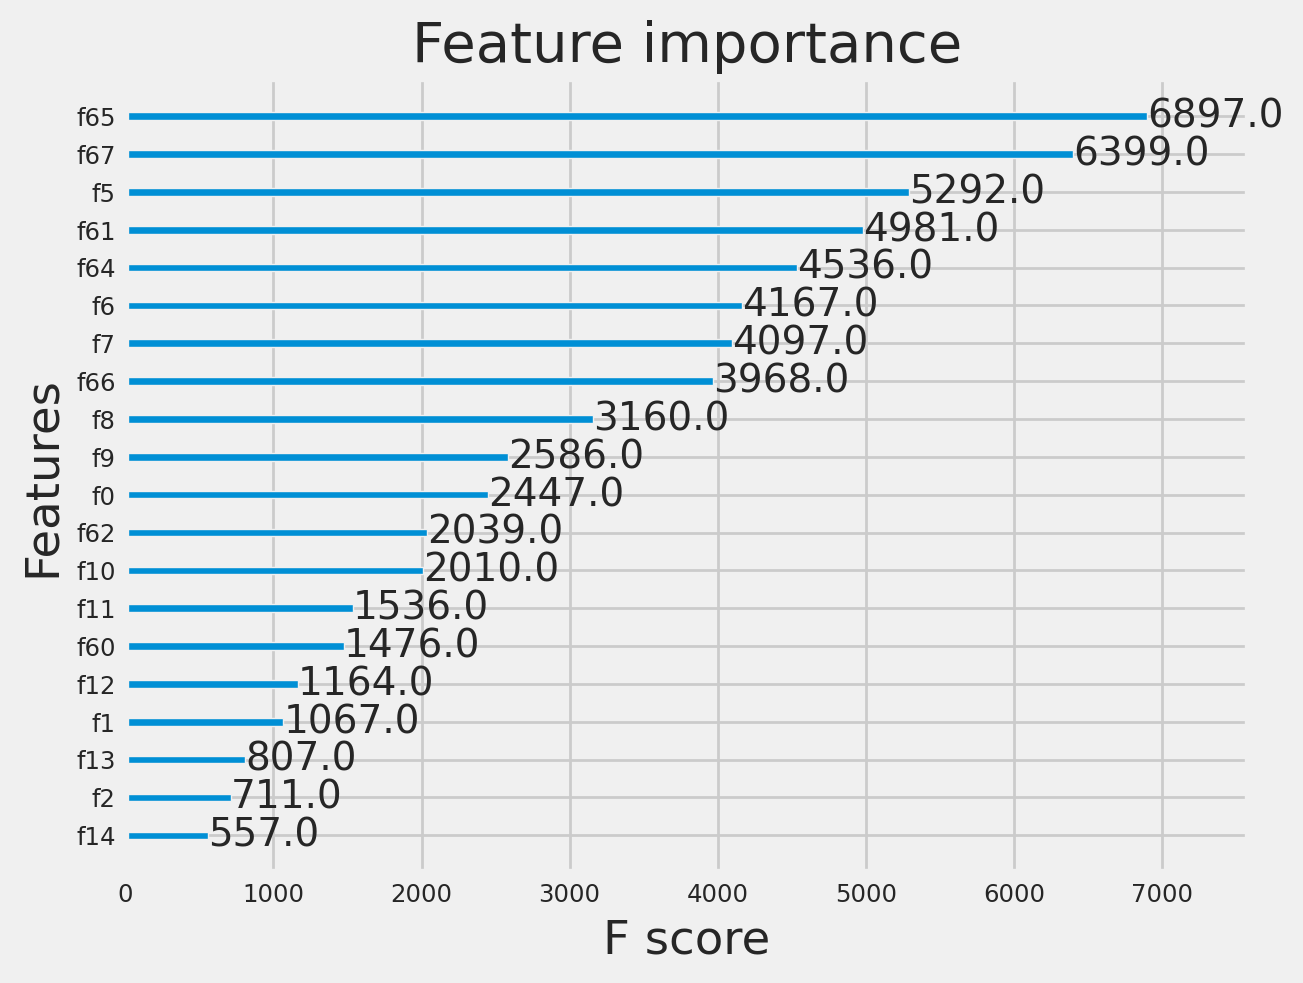

In [ ]:
xgboost.plot_importance(xgb_model,importance_type='weight',max_num_features=20)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

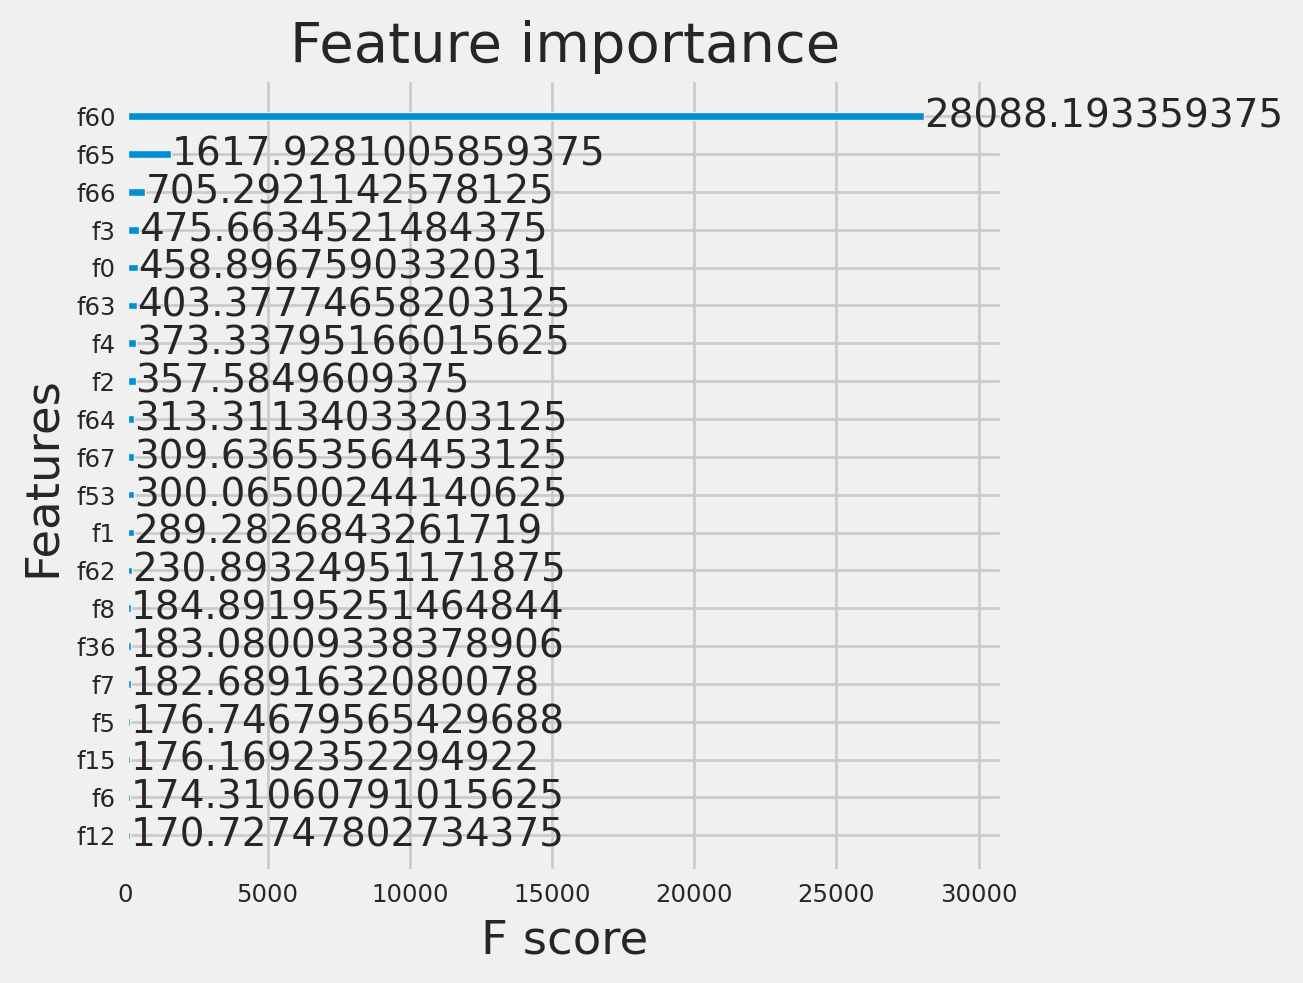

In [ ]:
xgboost.plot_importance(xgb_model,importance_type='gain',max_num_features=20)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

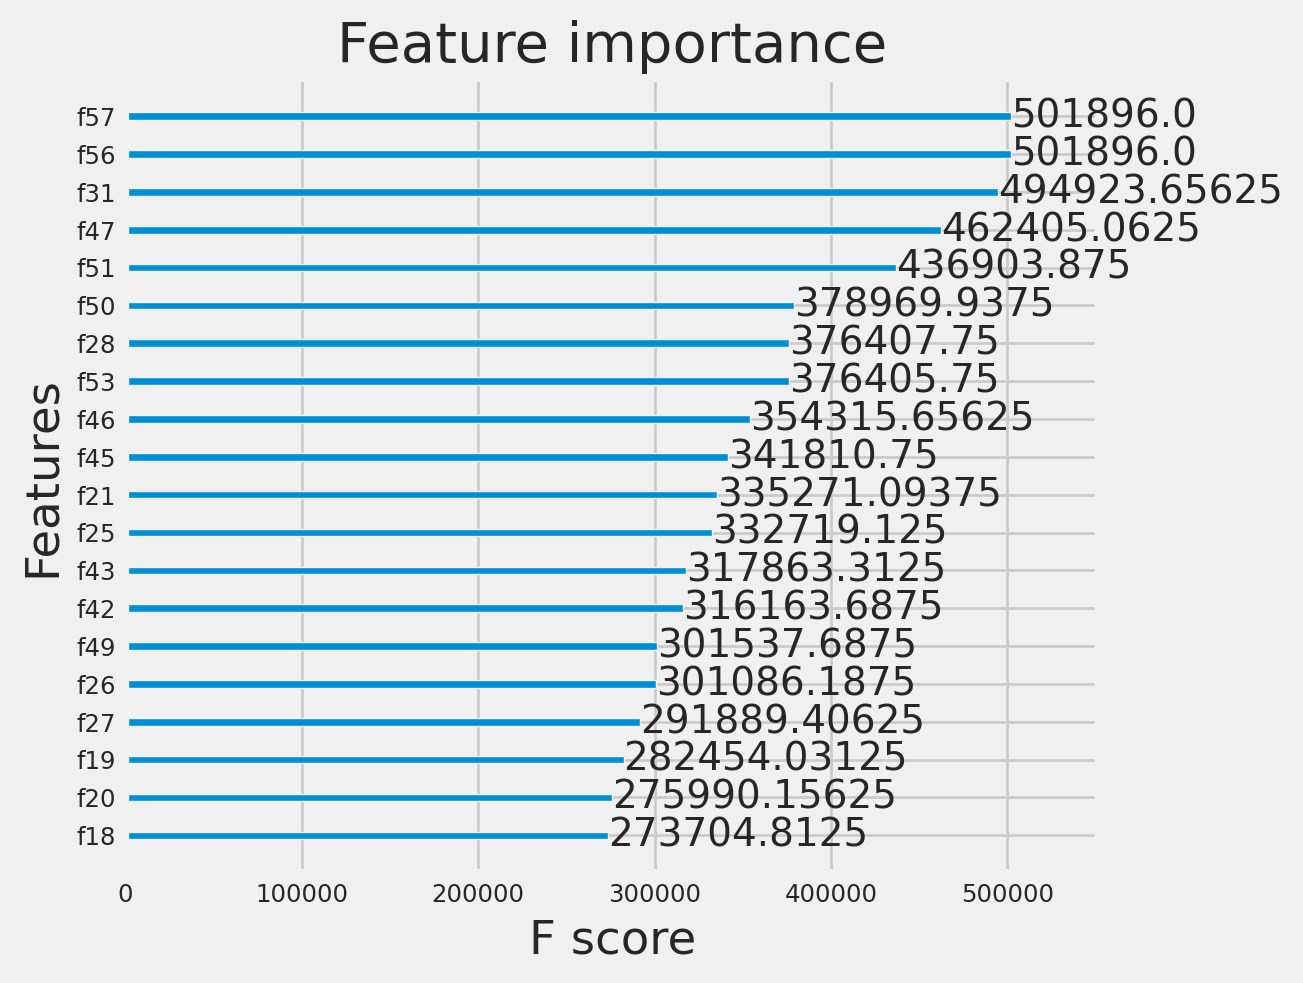

In [ ]:
xgboost.plot_importance(xgb_model,importance_type='cover',max_num_features=20)

[Text(0, 0, '0.0120'),
 Text(0, 0, '0.0076'),
 Text(0, 0, '0.0094'),
 Text(0, 0, '0.0125'),
 Text(0, 0, '0.0098'),
 Text(0, 0, '0.0046'),
 Text(0, 0, '0.0046'),
 Text(0, 0, '0.0048'),
 Text(0, 0, '0.0048'),
 Text(0, 0, '0.0044'),
 Text(0, 0, '0.0044'),
 Text(0, 0, '0.0043'),
 Text(0, 0, '0.0045'),
 Text(0, 0, '0.0039'),
 Text(0, 0, '0.0044'),
 Text(0, 0, '0.0046'),
 Text(0, 0, '0.0034'),
 Text(0, 0, '0.0032'),
 Text(0, 0, '0.0024'),
 Text(0, 0, '0.0019'),
 Text(0, 0, '0.0009'),
 Text(0, 0, '0.0022'),
 Text(0, 0, '0.0010'),
 Text(0, 0, '0.0004'),
 Text(0, 0, '0.0011'),
 Text(0, 0, '0.0007'),
 Text(0, 0, '0.0008'),
 Text(0, 0, '0.0018'),
 Text(0, 0, '0.0006'),
 Text(0, 0, '0.0000'),
 Text(0, 0, '0.0002'),
 Text(0, 0, '0.0002'),
 Text(0, 0, '0.0000'),
 Text(0, 0, '0.0002'),
 Text(0, 0, '0.0000'),
 Text(0, 0, '0.0024'),
 Text(0, 0, '0.0048'),
 Text(0, 0, '0.0032'),
 Text(0, 0, '0.0032'),
 Text(0, 0, '0.0034'),
 Text(0, 0, '0.0024'),
 Text(0, 0, '0.0015'),
 Text(0, 0, '0.0014'),
 Text(0, 0,

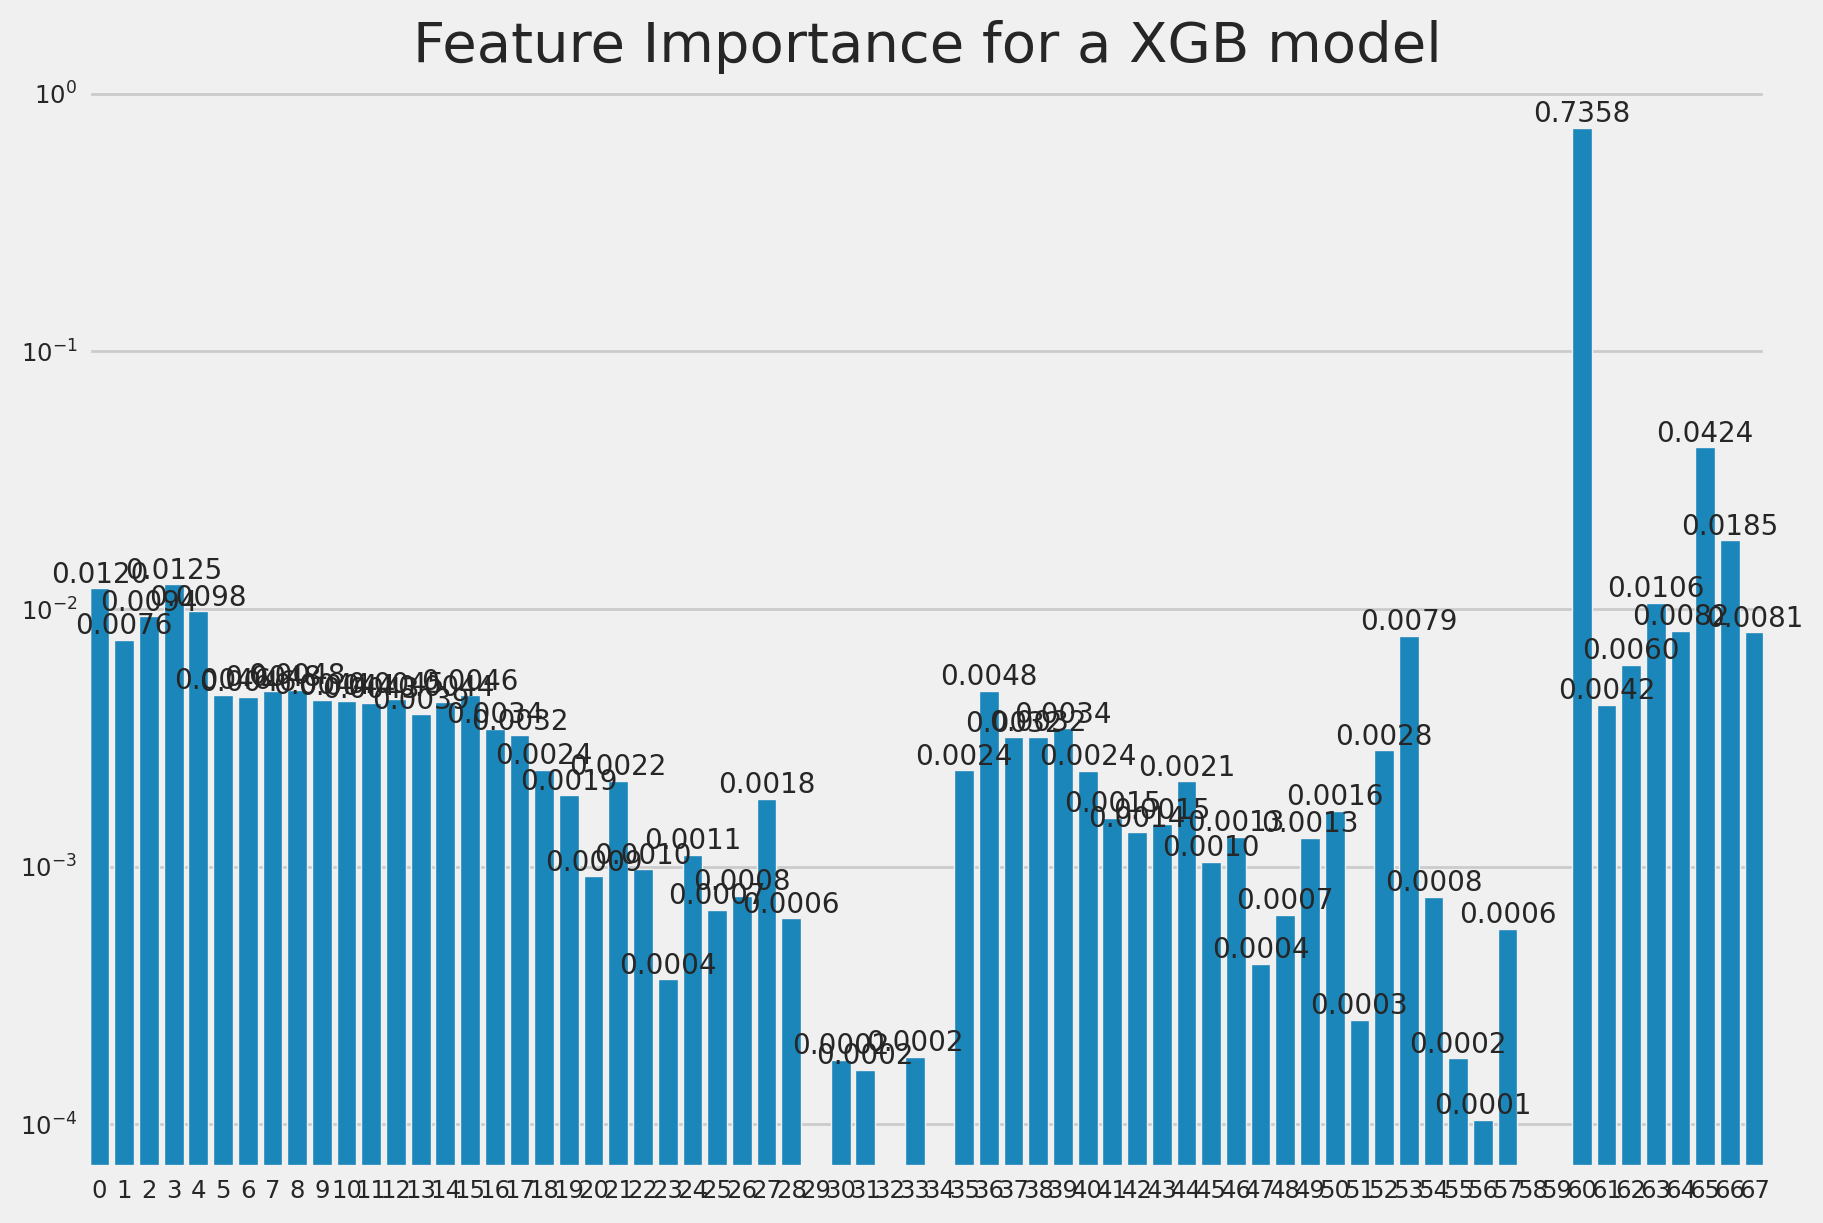

In [ ]:
fig,ax = plt.subplots(figsize = (9,6))
sns.barplot(xgb_model.feature_importances_,ax=ax)
ax.set_yscale('log')
ax.set_title('Feature Importance for a XGB model')
ax.bar_label(ax.containers[0],fmt="%.4f", fontsize=10)

In [ ]:
col_scalar=['quality',
 'store',
 'Author',
 'Author_mul',
 'Publshr'
 'Pdate',
 'RglPrice',
# 'SlsPrice',
 'SalesPoint']
#crop,crop_idx = True,[-1,-2]
if crop :
    crop_idx2 = list(map(lambda x : len(col_scalar)+x if x < 0 else x, crop_idx))
    crop_idx2 = sorted(crop_idx2,reverse=True)
    print(crop_idx2)
    for i in crop_idx2:
        col_scalar =col_scalar[:i]+col_scalar[i+1:]
col_scalar

['quality',
 'store',
 'Author',
 'Author_mul',
 'PublshrPdate',
 'RglPrice',
 'SalesPoint']

In [ ]:
col_partition = [(0,5),(5,35),(35,60)]+[(60+i,61+i) for i in range(len(col_scalar))]

In [ ]:
cols_setting = list(zip(col_vector+col_scalar,col_partition))
fi_model =xgb_model.feature_importances_
concatted_FI = dict()
for (col,partition) in cols_setting:
    concatted_FI[col] = np.sum(fi_model[partition[0]:partition[1]])
concatted_FI, sum(list(concatted_FI.values()))

({'Category': 0.05121034,
  'BName': 0.070193425,
  'BName_sub': 0.044716537,
  'quality': 0.7358457,
  'store': 0.004234632,
  'Author': 0.0060488693,
  'Author_mul': 0.010567564,
  'PublshrPdate': 0.008208033,
  'RglPrice': 0.042385973,
  'SalesPoint': 0.018477023},
 0.9918880802579224)

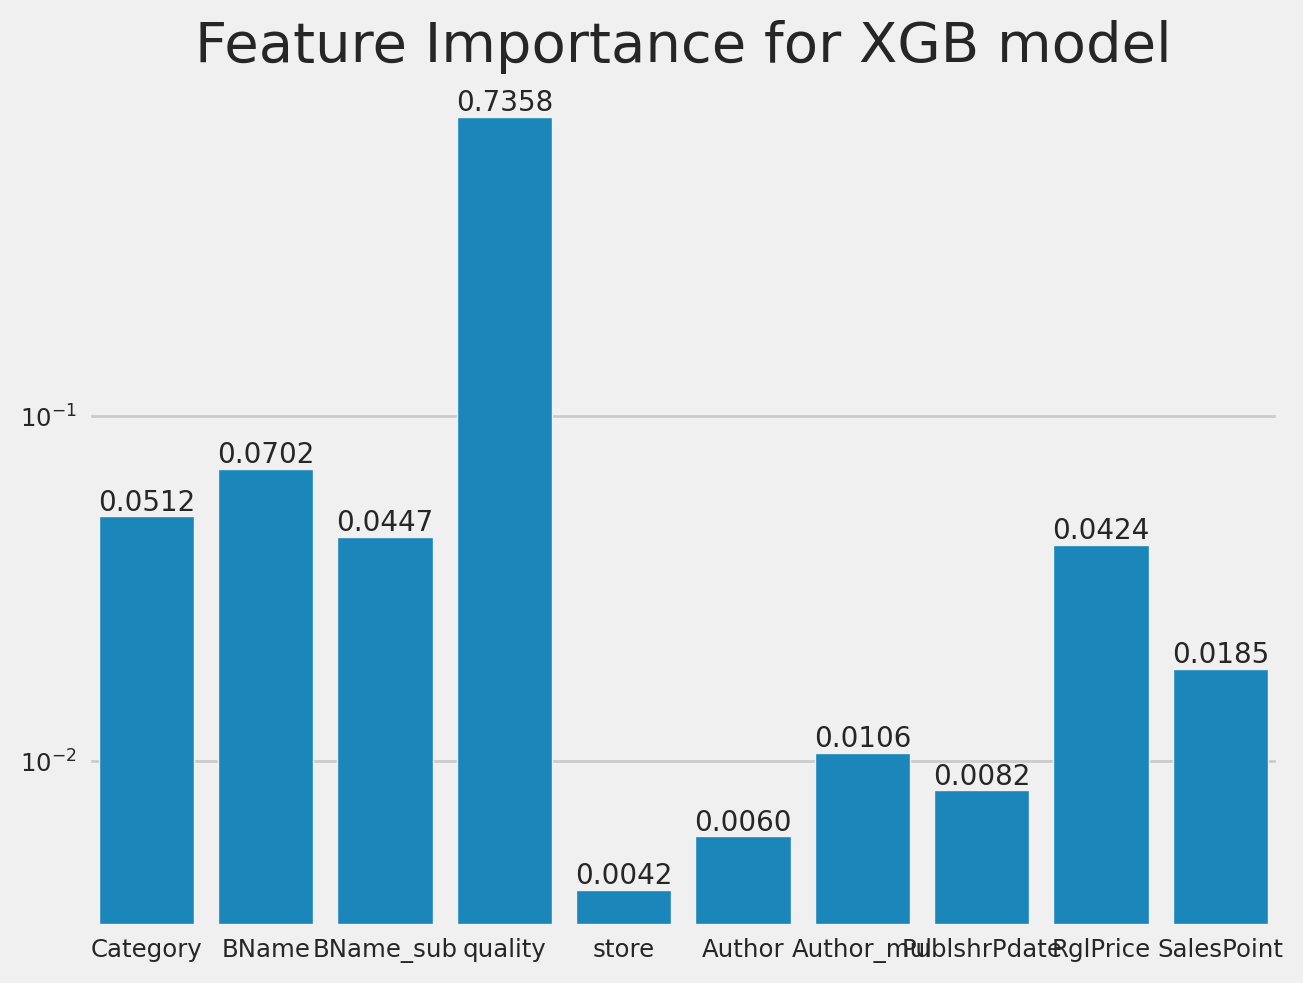

In [ ]:
fig,ax = plt.subplots()
sns.barplot(concatted_FI,ax=ax)
ax.set_yscale('log')
ax.set_title('Feature Importance for XGB model')
ax.bar_label(ax.containers[0],fmt="%.4f", fontsize=10)
#ax.set_xticklabels([])
pass

Text(0.5, 1.0, 'distribution of absolute errors')

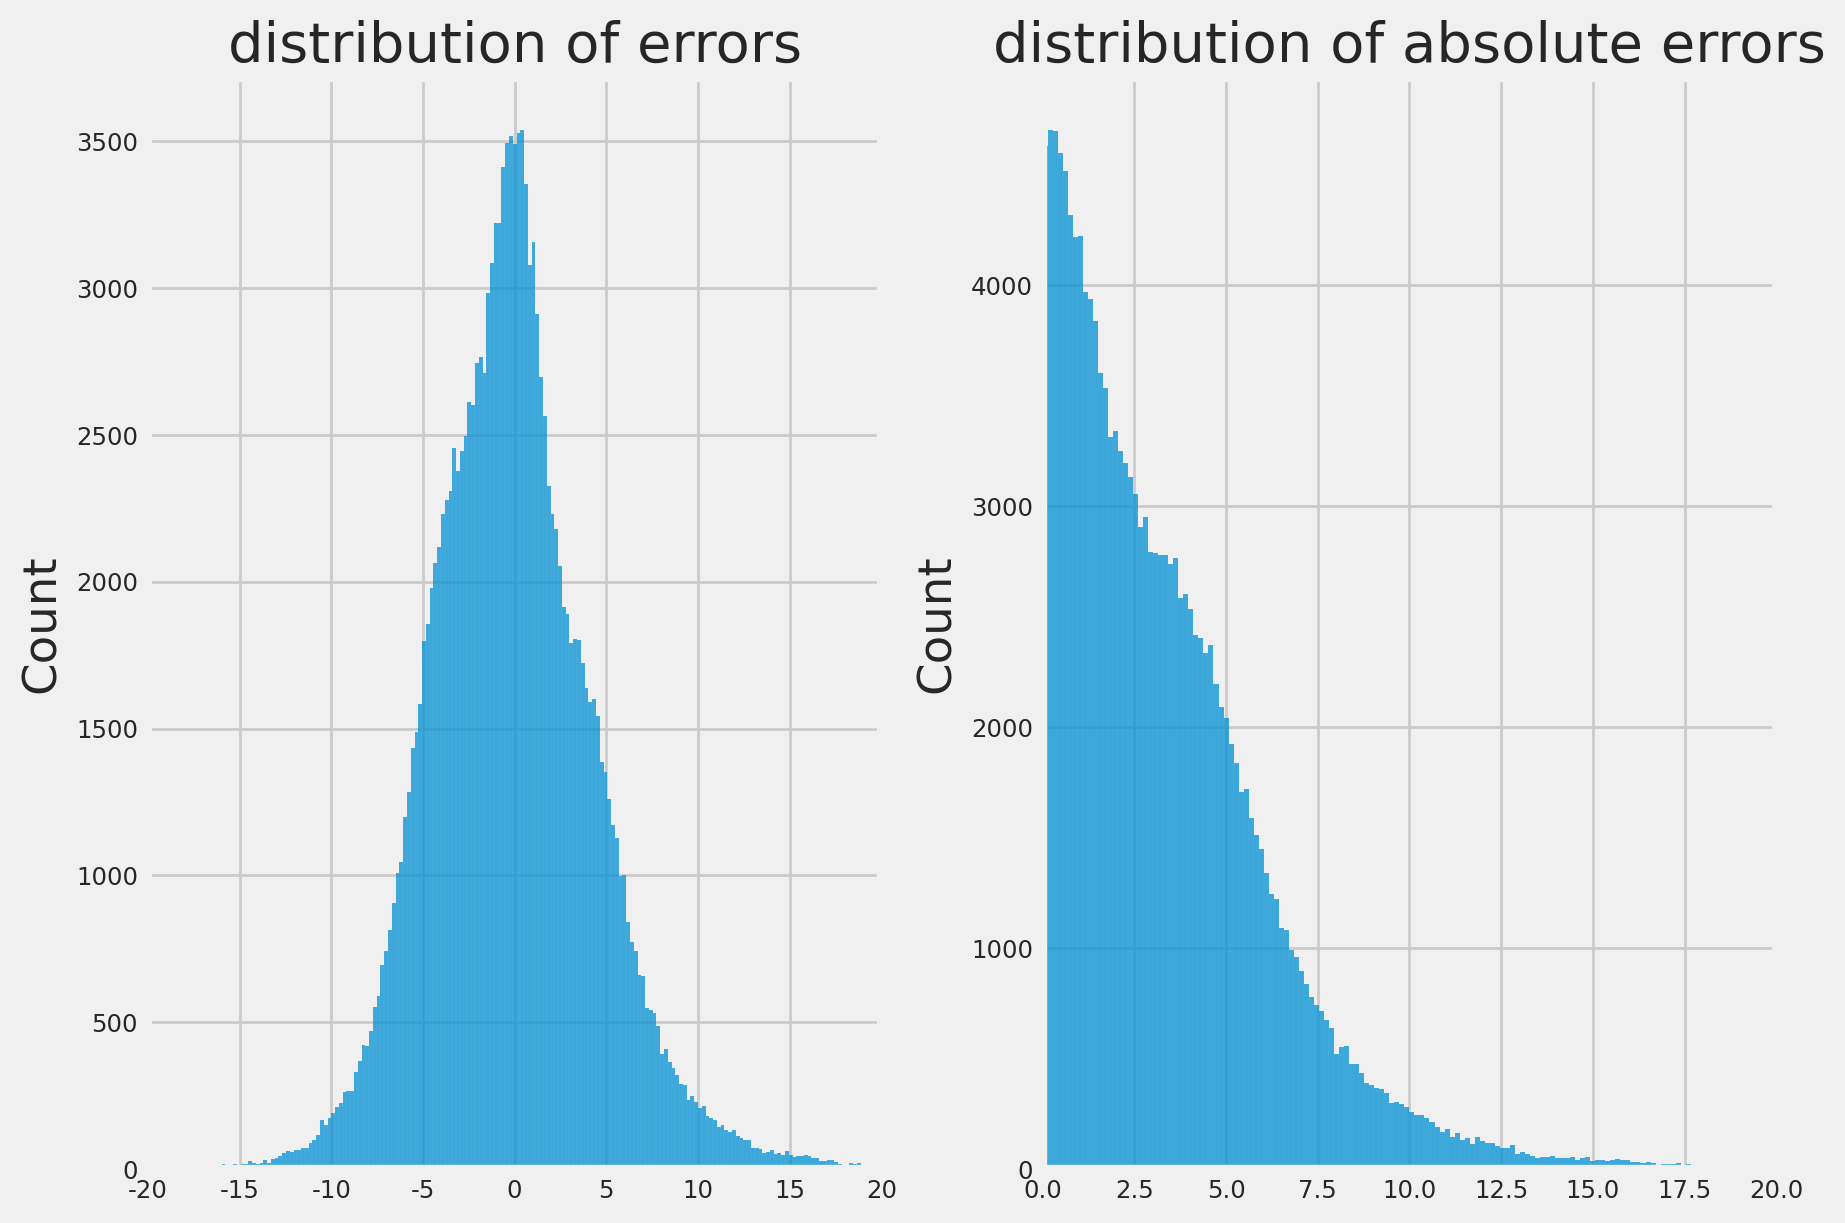

In [ ]:
fig,axes = plt.subplots(1,2,figsize = (9,6))
sns.histplot((dict_data['test']['y']-dict_rslt['test']),ax=axes[0])
axes[0].set_xlim([-20,20])
axes[0].set_title('distribution of errors')
sns.histplot(np.abs(dict_data['test']['y']-dict_rslt['test']),ax=axes[1])
axes[1].set_xlim([0,20])
axes[1].set_title('distribution of absolute errors')
#ax.set_yscale('log');

- 만약 ItemId가 포함되지 않은 것들로 test set을 추리면 어떻게 될까

**predict sales point with other features**
- It has some meaning since SalesPoint is the index for how huge is a sales volume of books now. A prediction to current sales volume based on distribution of used price of products would be meaningfull

# simple RNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

num_feat = X_train.shape[1]
model_rnn = Sequential()
model_rnn.add(SimpleRNN(10, input_shape=(num_feat, 1), return_sequences=True))
#model_rnn.add(Dense(1, activation = 'tanh'))
model_rnn.add(SimpleRNN(10, return_sequences=False))
model_rnn.add(Dense(1, activation = 'tanh'))

In [ ]:
model_rnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_8 (SimpleRNN)    (None, 68, 10)            120       
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 341 (1.33 KB)
Trainable params: 341 (1.33 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import keras

opt = keras.optimizers.Adam(learning_rate=0.1)

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers

from keras import backend as K

def recall(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn)

    # (True Positive + False Negative) = 실제 값이 1(Positive) 전체
    count_true_positive_false_negative = K.sum(y_target_yn)

    # Recall =  (True Positive) / (True Positive + False Negative)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    recall = count_true_positive / (count_true_positive_false_negative + K.epsilon())

    # return a single tensor value
    return recall


def precision(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn)

    # (True Positive + False Positive) = 예측 값이 1(Positive) 전체
    count_true_positive_false_positive = K.sum(y_pred_yn)

    # Precision = (True Positive) / (True Positive + False Positive)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    precision = count_true_positive / (count_true_positive_false_positive + K.epsilon())

    # return a single tensor value
    return precision


def f1score(y_target, y_pred):
    _recall = recall(y_target, y_pred)
    _precision = precision(y_target, y_pred)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    _f1score = ( 2 * _recall * _precision) / (_recall + _precision+ K.epsilon())

    # return a single tensor value
    return _f1score

def f1score_loss(y_target, y_pred):
  return 1 - f1score(y_target,y_pred)

In [ ]:
model_rnn.compile(optimizer=opt, loss='mse', metrics=[f1score])

In [ ]:
history = model_rnn.fit(X_train, y_dscnt['train'], epochs=20, batch_size=4096, verbose=1, validation_split = 0.2)

Epoch 1/20
99/99 [==============================] - 16s 127ms/step - loss: 2173.5339 - f1score: 1.0000 - val_loss: 2179.1497 - val_f1score: 1.0000
Epoch 2/20
99/99 [==============================] - 12s 123ms/step - loss: 2173.5332 - f1score: 1.0000 - val_loss: 2179.1497 - val_f1score: 1.0000
Epoch 3/20
23/99 [=====>........................] - ETA: 13s - loss: 2174.6665 - f1score: 0.9999

KeyboardInterrupt: 

In [ ]:
pred = model_rnn.predict(X_train)
sns.scatterplot(pred,y_dscnt['train'])

15685/15685 [==============================] - 206s 13ms/step


TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

In [ ]:
make_reg_score_dict(y_dscnt['train'],pred,np.mean(y_dscnt['train']))

NameError: name 'make_reg_score_dict' is not defined